# Is Warren Buffet's Portfolio Choice Optimal?

## 1. Introduction

Warren Buffet is the world's most prominent value investor. We decided to analyze his portfolio to see if there were any improvements to be made. We loosely make use of the work of:
- Michael Pinelis and David Ruppert (Machine learning portfolio allocation(2021))
-  Shihao Gu, Bryan Kelly, and Dacheng Xiu (Empirical Asset Pricing via Machine
 Learning(2019))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import base64
from IPython.display import Image, display
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import cvxpy as cp
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from pypfopt import risk_models, expected_returns, BlackLittermanModel, plotting
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.covariance import LedoitWolf
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FunctionTransformer, Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import re



/opt/homebrew/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
BuffetPortfolioOverview = pd.read_csv("Warren Buffet Portfolio Overview.csv")
BuffetPortfolioOverview

,Company,Ticker,"Market value as of 31 March, 2024",Number of shares,% of total portfolio
0,APPLE INC (COM),AAPL,"135,360,902,000","789,368,450",40.81%
1,BANK OF AMERICA CORP (COM),BAC,"39,165,748,000","1,032,852,006",11.81%
2,AMERICAN EXPRESS CO (COM),AXP,"34,520,240,000","151,610,700",10.41%
3,COCA COLA CO (COM),KO,"24,472,000,000","400,000,000",7.38%
4,CHEVRON CORP (COM),CVX,"19,398,898,000","122,980,207",5.85%
5,OCCIDENTAL PETROLEUM (COM),OXY,"16,118,698,000","248,018,128",4.86%
6,KRAFT HEINZ CO (COM),KHC,"12,015,925,000","325,634,818",3.62%
7,MOODYS CORP (COM),MCO,"9,695,962,000","24,669,778",2.92%
8,CHUBB LIMITED (COM),CB,"6,717,645,000","25,923,840",2.03%
9,DAVITA HEALTHCARE PARTNERS (COM),DVA,"4,982,993,000","36,095,570",1.50%


## 2. Research Method

The image below provides an overview of how we plan to proceed with our analysis.

In [3]:
def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""
graph TD
    subgraph "Data Preprocessing"
        A[Raw Data] --> B[Missing Value Imputation]
        B --> C[Feature Engineering]
        C --> D[Normalization]
        D --> E[Feature Selection]
   
    end
    E --> I
    subgraph "Modeling"
        I[Hyperparameter Tuning] --> J[Model Training]
        J --> K[Model Evaluation]
    end
    K --> L
    K --> O
    subgraph "Optimization with Black-Litterman Model"
        L[Black-Litterman Model] --> M[Efficient Frontier]
        M --> N[Optimal Portfolio]
    end
    subgraph "Optimization with Machine Learning"
        O[Machine Learning Models] --> P[Optimal Portfolio]
    end
   
""")

## 3. Data Processing

In [5]:
financial_ratios = pd.read_csv("2014-2024 Buffet Portfolio - financial ratios.csv")
financial_ratios.describe()

,gvkey,permno,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,...,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing
count,4711.000000,4711.000000,4642.000000,4397.000000,4701.000000,4640.000000,4640.000000,4640.000000,4640.000000,4701.000000,...,4521.000000,4696.000000,4375.000000,2479.000000,4701.000000,4701.000000,4701.000000,4680.000000,4397.000000,3051.000000
mean,40526.249629,52176.914031,29.878632,0.603942,12.443296,12.870193,13.309260,16.051649,17.033933,3.696466,...,8.888087,1.292531,3.418766,14.165560,0.015078,0.020006,0.071173,-0.041818,5.523823,1.640502
std,58402.993987,29634.292265,137.151234,0.508289,127.622422,53.446141,53.375605,82.607543,82.795749,6.762963,...,12.296629,2.200181,9.041726,43.464448,0.044623,0.028905,0.124070,0.058970,9.266644,5.971164
min,1447.000000,11308.000000,-2615.300000,0.003000,-4544.900000,-714.520000,-714.520000,-2125.000000,-2125.000000,0.062000,...,-0.233000,0.113000,0.120000,-172.250000,0.000000,0.000000,0.000000,-0.267000,0.222000,-77.522000
25%,6239.000000,16678.000000,11.699750,0.199000,9.098000,9.100500,9.259250,8.402750,8.348750,1.190000,...,1.741000,0.383000,0.672500,2.986500,0.000000,0.000000,0.000000,-0.071000,1.076000,0.188000
50%,12459.000000,56223.000000,20.942000,0.466000,12.573000,15.622500,15.936000,16.173500,15.949500,1.888000,...,4.070000,0.715000,1.396000,6.415000,0.000000,0.006000,0.000000,-0.036000,2.175000,0.616000
75%,61483.000000,81055.000000,35.358500,0.928000,17.987000,24.894000,25.753750,27.509250,27.724250,3.906000,...,10.905000,1.235250,2.573000,12.497000,0.004000,0.032000,0.148000,-0.012000,5.232000,1.449000
max,339965.000000,92611.000000,1447.000000,3.614000,1223.880000,478.000000,490.500000,758.328000,774.000000,126.556000,...,77.108000,44.562000,152.413000,977.032000,0.465000,0.204000,0.905000,0.757000,64.657000,63.498000


In [6]:
stock = pd.read_csv("2014-2024 Buffet Portfolio - stock.csv")
stock.describe()

/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_4431/244833115.py:1: DtypeWarning: Columns (5,9,22,49,57) have mixed types. Specify dtype option on import or set low_memory=False.
  stock = pd.read_csv("2014-2024 Buffet Portfolio - stock.csv")


,PERMNO,SHRCD,EXCHCD,NAICS,PERMCO,ISSUNO,HEXCD,HSICCD,DLAMT,DLSTCD,...,SHROUT,CFACPR,CFACSHR,OPENPRC,NUMTRD,vwretd,vwretx,ewretd,ewretx,sprtrn
count,89589.000000,89589.000000,89589.000000,89563.000000,89589.000000,89589.000000,89589.000000,89589.000000,44.000000,44.000000,...,8.958300e+04,89583.000000,89583.000000,89583.000000,2.639500e+04,89589.000000,89589.000000,89589.000000,89589.000000,89589.000000
mean,49773.033832,15.129893,1.757973,464534.521733,29650.113954,16938.273159,1.801505,5891.083269,6.538636,115.250000,...,1.314680e+06,1.576633,1.546429,227.541278,7.267247e+04,0.000449,0.000371,0.000343,0.000261,0.000439
std,30343.528813,14.497378,1.053536,110869.404027,17500.224502,29921.136917,1.062598,2302.737062,23.420962,43.099736,...,2.443694e+06,3.051686,3.055253,635.758014,1.557989e+05,0.011025,0.011024,0.010709,0.010710,0.011170
min,11308.000000,11.000000,1.000000,211111.000000,7.000000,0.000000,1.000000,1311.000000,0.000000,100.000000,...,3.179000e+03,0.904200,0.250000,3.050000,0.000000e+00,-0.118168,-0.118218,-0.107631,-0.107768,-0.119841
25%,15998.000000,11.000000,1.000000,423990.000000,20440.000000,0.000000,1.000000,4832.000000,0.000000,100.000000,...,1.845000e+05,1.000000,1.000000,37.475000,7.672000e+03,-0.003923,-0.003978,-0.004576,-0.004659,-0.003812
50%,56223.000000,11.000000,1.000000,517210.000000,21299.000000,0.000000,1.000000,6029.000000,0.000000,100.000000,...,4.387400e+05,1.000000,1.000000,76.660000,2.055000e+04,0.000668,0.000550,0.000709,0.000623,0.000597
75%,80924.000000,11.000000,3.000000,524130.000000,50700.000000,20733.000000,3.000000,7370.000000,0.000000,100.000000,...,1.045085e+06,1.000000,1.000000,163.519995,5.295650e+04,0.005631,0.005565,0.005748,0.005679,0.005690
max,92611.000000,73.000000,4.000000,721110.000000,59045.000000,89707.000000,4.000000,9999.000000,128.769990,241.000000,...,1.710254e+07,28.000000,28.000000,7028.500000,2.970000e+06,0.091556,0.091477,0.082175,0.082032,0.093828


Merged data was created with the combination of the financial ratios, stock ratios and a few macroeconomic predictors as indicated by Gu et al. Here we simply present the cleaned data as the merge process was lengthy, and laborious.

In [7]:
df = pd.read_csv("merged_financial_stock_macro_data.csv")
df = df.drop(df.columns[0], axis=1)
df.head()

,TICKER,date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,...,TICKER_encoded,SHRCD_encoded,EXCHCD_encoded,SICCD_encoded,market_cap,RET_calc,RET_interp,TB3MS,T10Y2Y,BAA10Y
0,AAPL,2014-01-31,17.588,0.327,7.993,12.506,12.594,12.594,12.594,2.613,...,0.0,0.0,1.0,10.0,4.465297e+08,0.001637,0.001637,0.04,2.464286,2.334762
1,AAPL,2014-02-28,18.776,0.296,7.764,0.463,0.466,0.466,0.466,2.698,...,0.0,0.0,1.0,10.0,4.694003e+08,-0.002710,-0.002710,0.05,2.382632,2.390000
2,AAPL,2014-03-31,18.501,0.296,7.764,0.472,0.475,0.475,0.475,2.658,...,0.0,0.0,1.0,10.0,4.625330e+08,-0.000224,-0.000224,0.05,2.324286,2.340952
3,AAPL,2014-04-30,20.332,0.296,7.764,0.519,0.523,0.523,0.523,2.921,...,0.0,0.0,1.0,10.0,5.082923e+08,-0.003782,-0.003782,0.03,2.288095,2.199048
4,AAPL,2014-05-31,20.513,0.302,7.873,0.537,0.540,0.540,0.540,3.097,...,0.0,0.0,1.0,10.0,5.452542e+08,-0.003746,-0.003746,0.03,2.170000,2.203810


# 4. Descriptive Analysis

In this section we explore various features of our data set. We can see that price is highly variable over time. In the correlation matrix we see that the price ratios related to shareholder dividends, income and operating expenses were the most highly correlated. For the most part, stock market returns were 0 and most companies had a negligible market size.

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


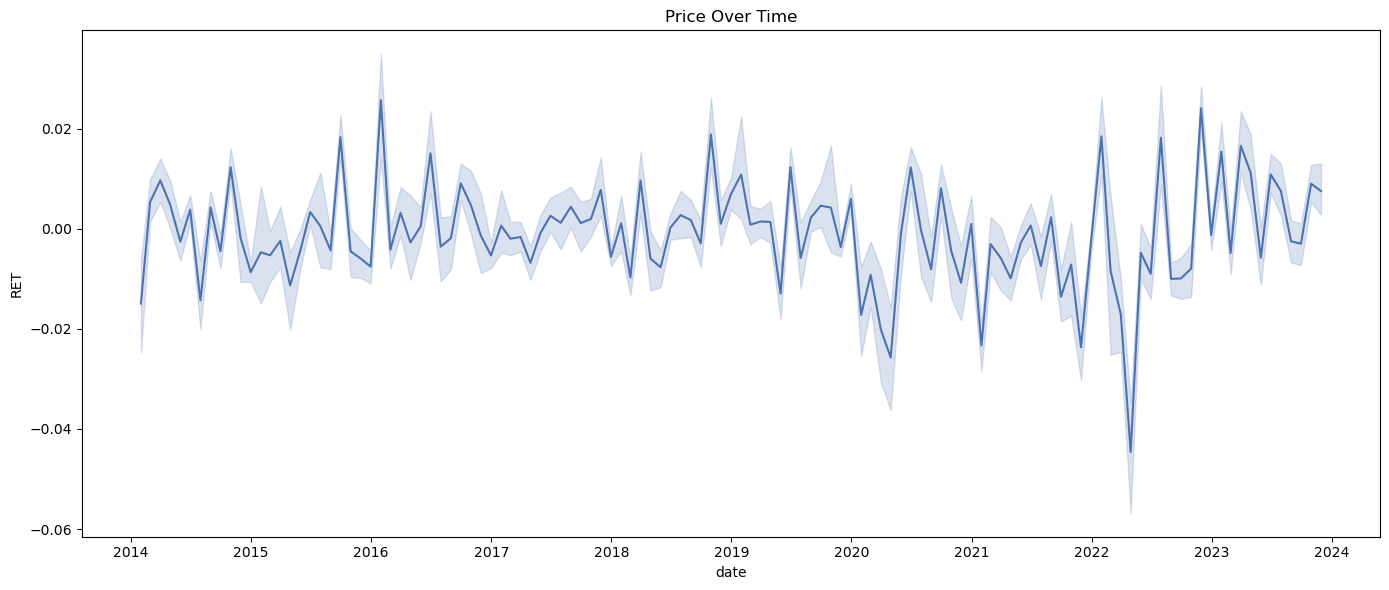

In [8]:
df['date'] = pd.to_datetime(df['date'])

# Basic statistical description
statistical_description = df.describe()

# Plotting the trends of a few selected metrics over time
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

# Plotting RET
sns.lineplot(x='date', y='RET', data=df).set_title('Price Over Time')

plt.tight_layout()
plt.show()

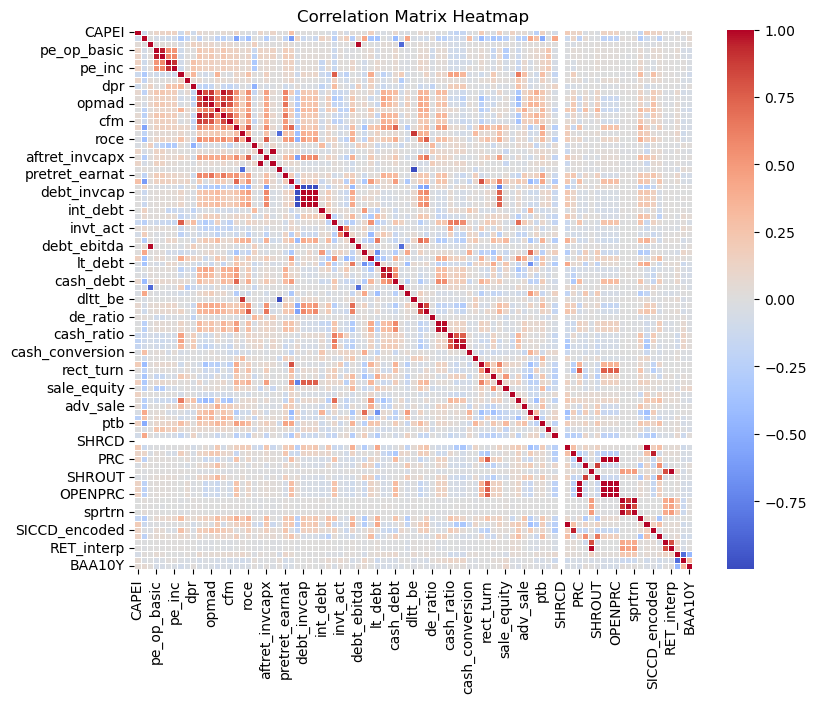

<Figure size 640x480 with 0 Axes>

In [9]:
# Recalculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).drop(columns = 'SHRCD_encoded').corr()

# Set up the matplotlib figure
plt.figure(figsize=(9, 7))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=False, fmt=".1f", linewidths=.5, cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()
plt.savefig('Correlation_matrix_heatmap.png')


/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_4431/1322763620.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  numeric_data.hist(layout=(-1, 3), bins=np.linspace(-1,1,50), ax=ax)


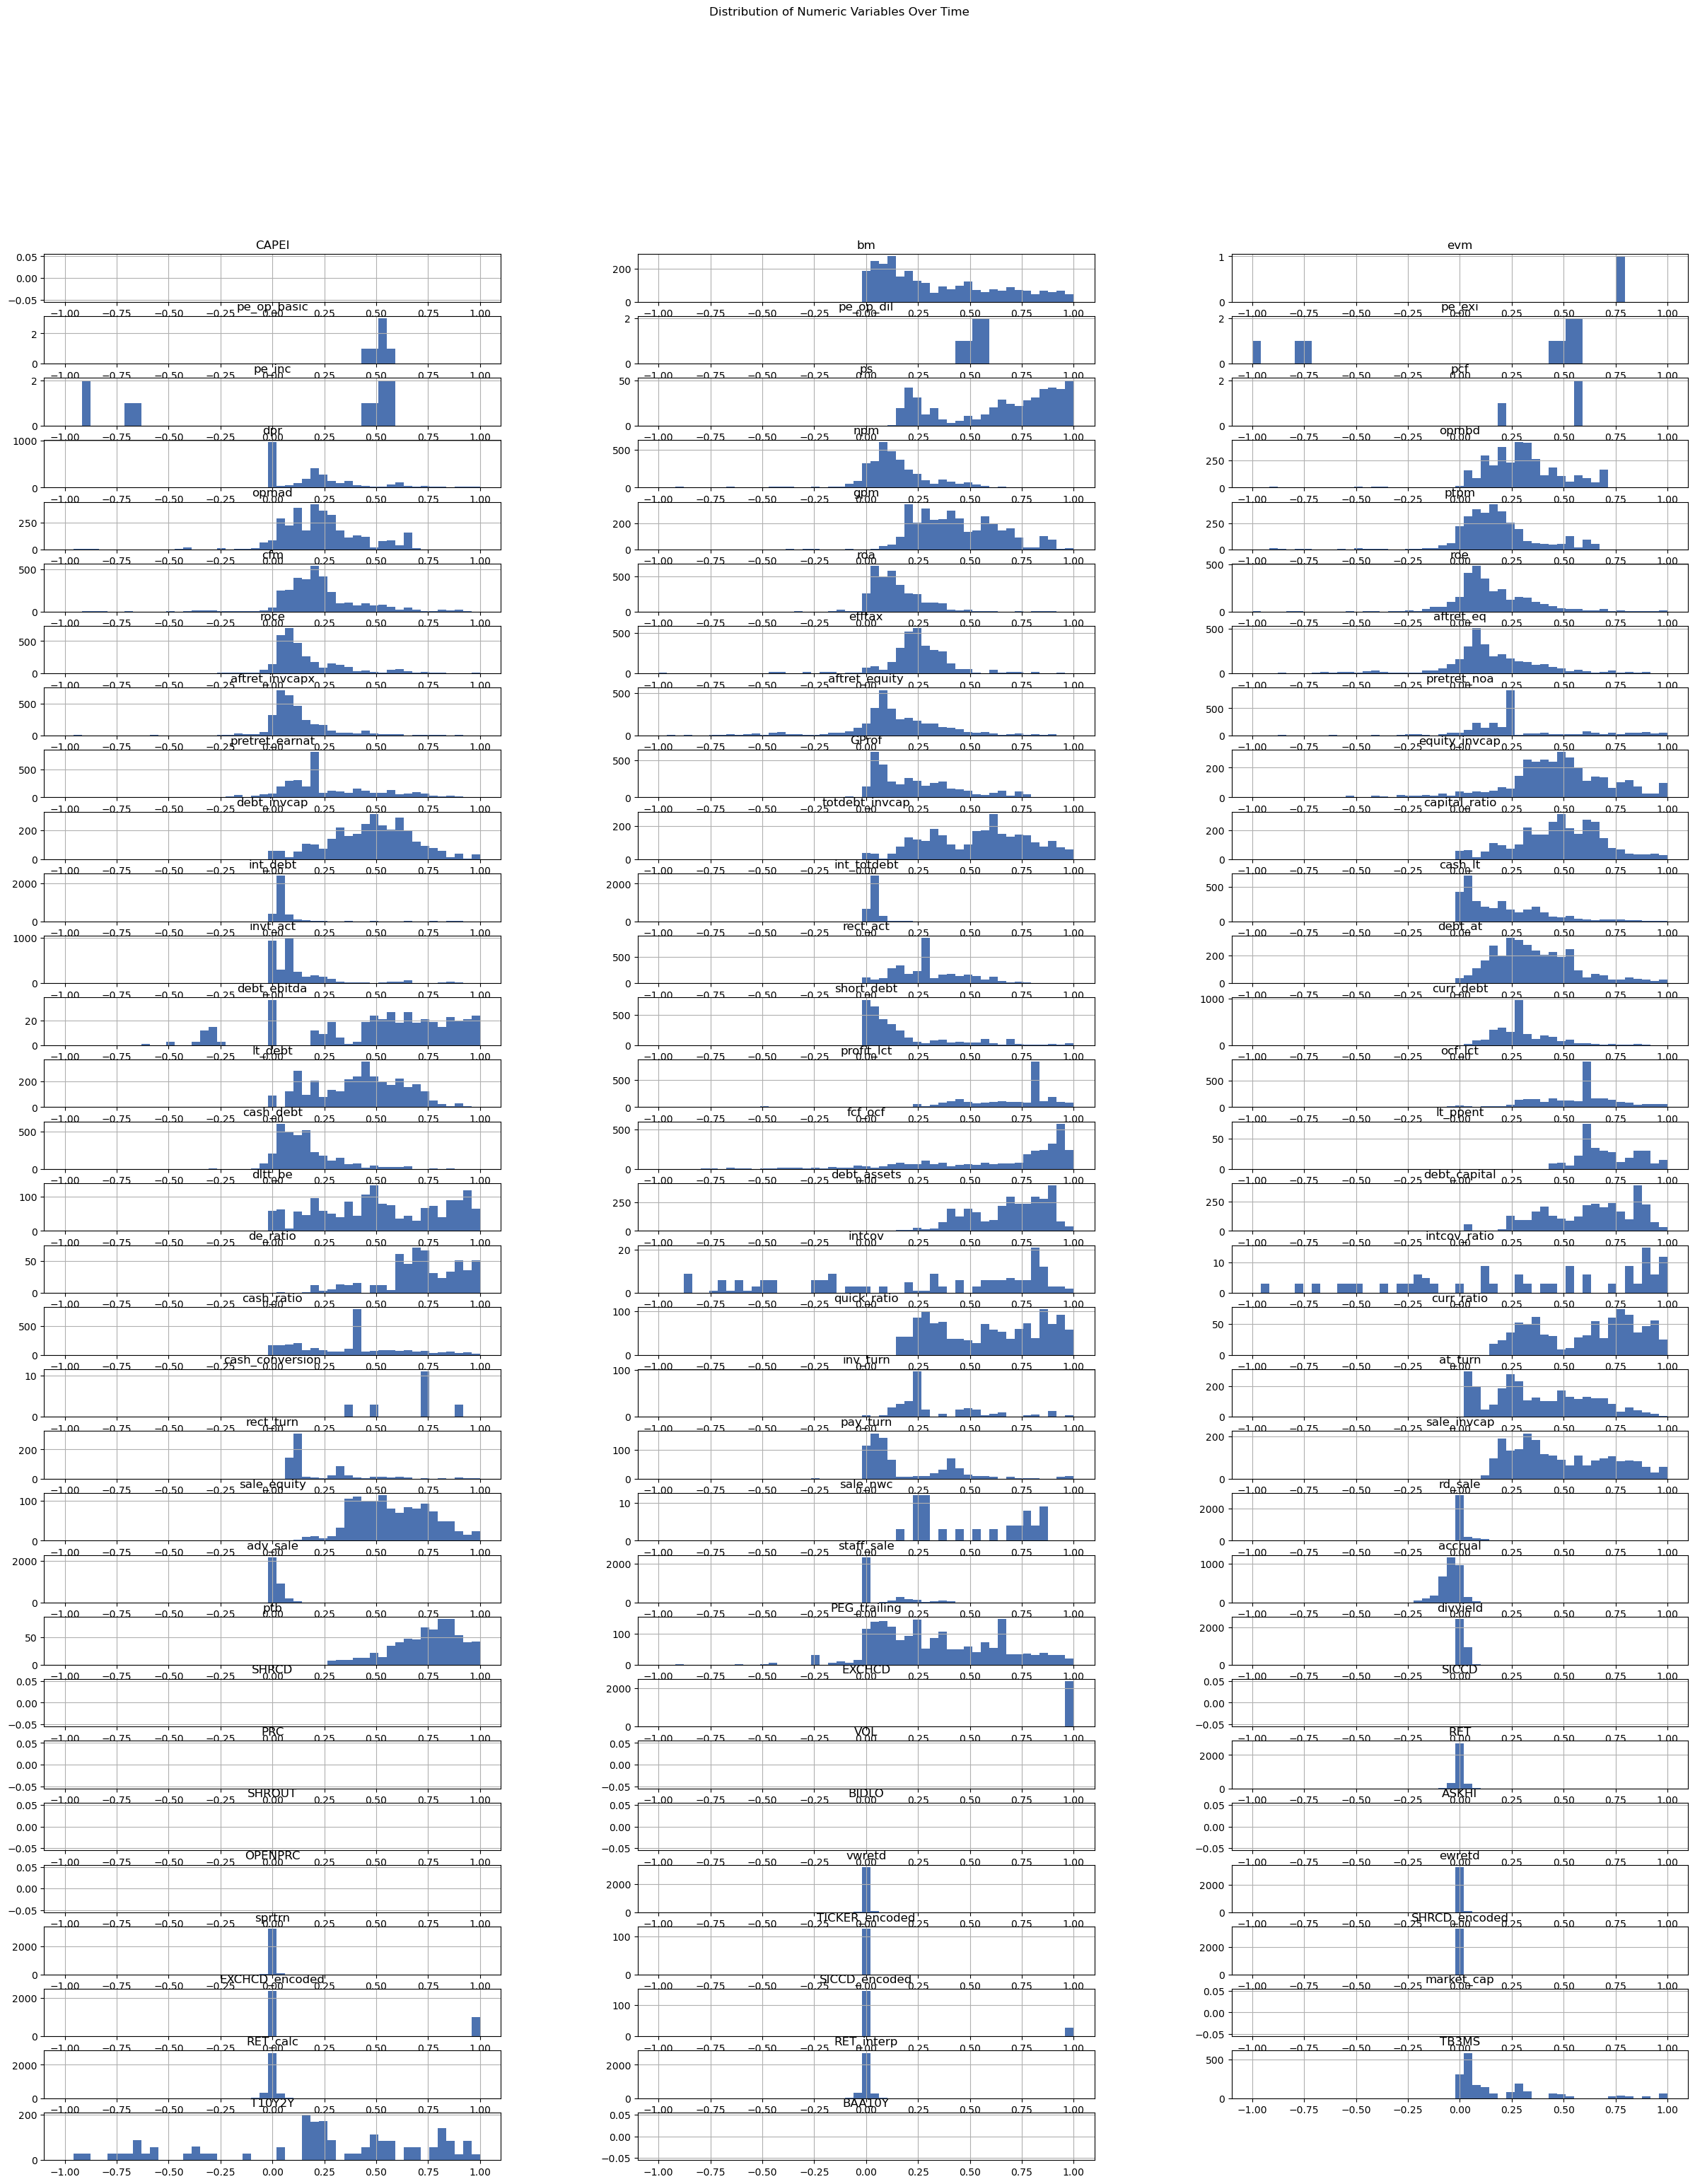

In [10]:
# Filter out non-numeric columns from merged_data
numeric_data = df.select_dtypes(include=[np.number])

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the figure height and width
fig.set_figheight(35)
fig.set_figwidth(30)

# Plot histograms for the numeric columns in numeric_data
numeric_data.hist(layout=(-1, 3), bins=np.linspace(-1,1,50), ax=ax)

# Set the title for the figure
fig.suptitle('Distribution of Numeric Variables Over Time')

# Save the figure as 'numbers_over_time.png'
plt.savefig('Distribution_of_Numeric_Variables_Over_Time.png')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


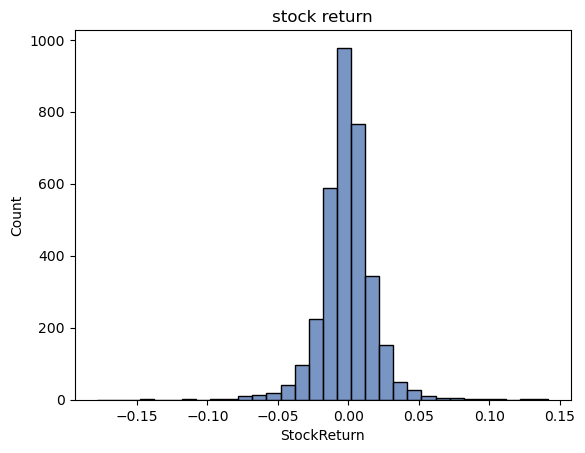

In [11]:
df_3 = df[["RET"]]
df_3 = df_3.rename(columns={'RET': 'StockReturn'})
sns.histplot(data = df_3, x ="StockReturn", binwidth = 0.01, binrange = (df_3["StockReturn"].min()+ 0.00000000001, df_3["StockReturn"].max()- 0.01))
plt.title('stock return')
plt.show()

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


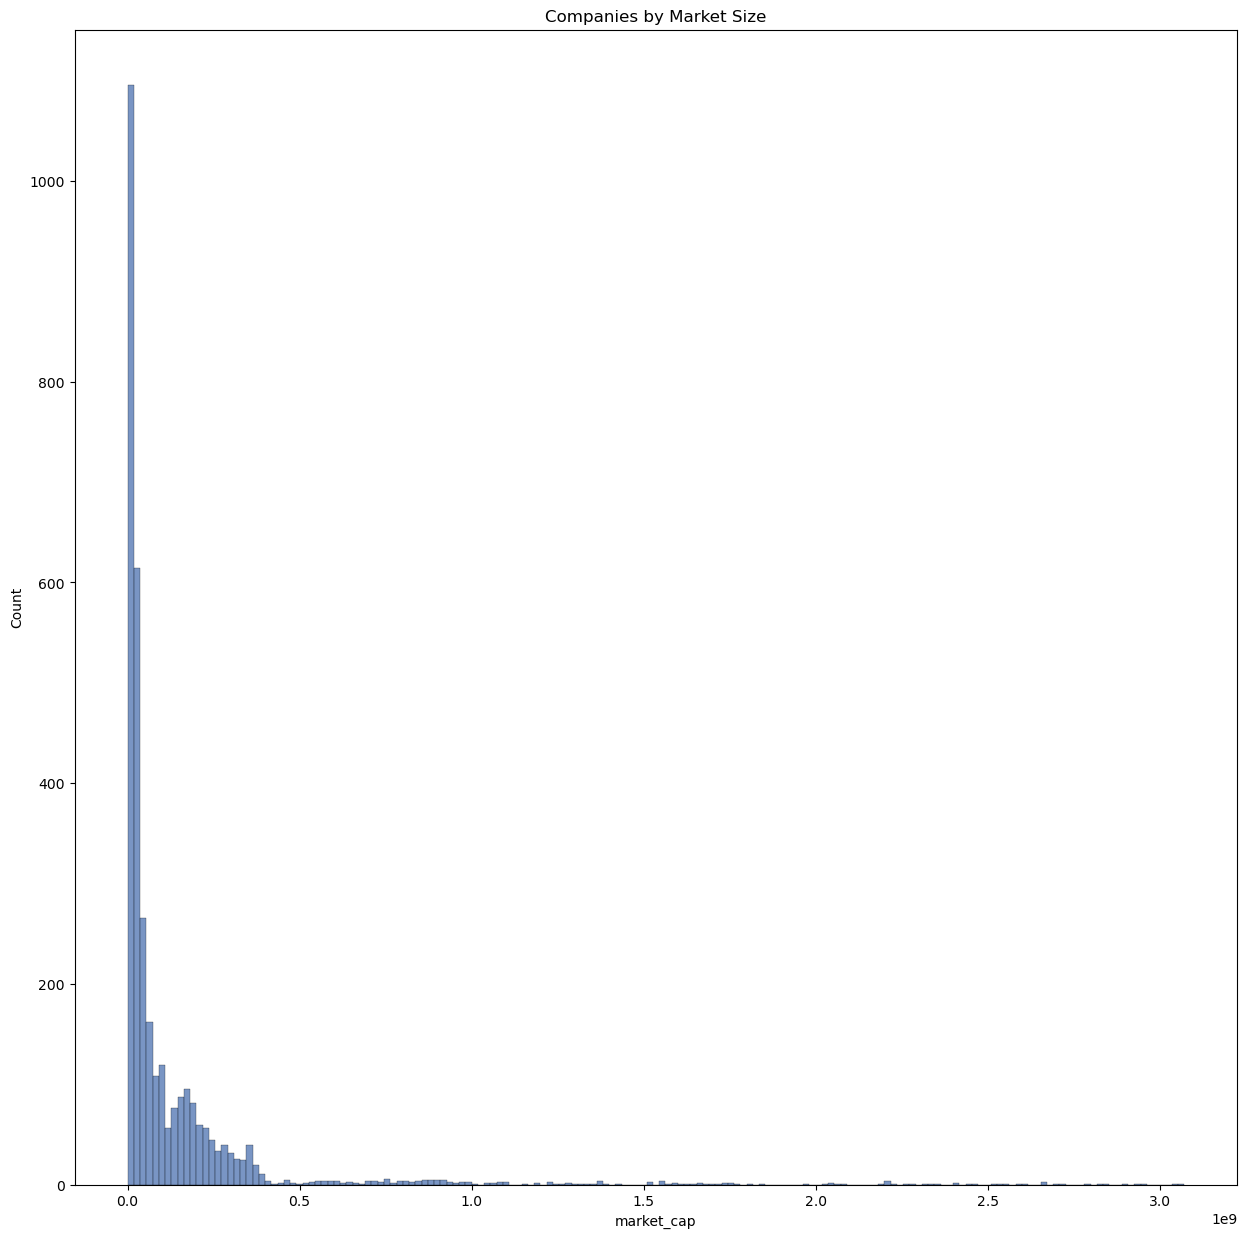

In [12]:
# Set the global size of the figure
fig, ax = plt.subplots()

# Calculate the maximum market capitalization
max_size = df['market_cap'].max()

# Plot the histogram
ax = sns.histplot(data=df, x="market_cap", binrange=(0, max_size))
ax.set_title('Companies by Market Size')  # Set the title

# Define the image size
fig.set_figheight(15)
fig.set_figwidth(15)

# Show the figure
plt.show()

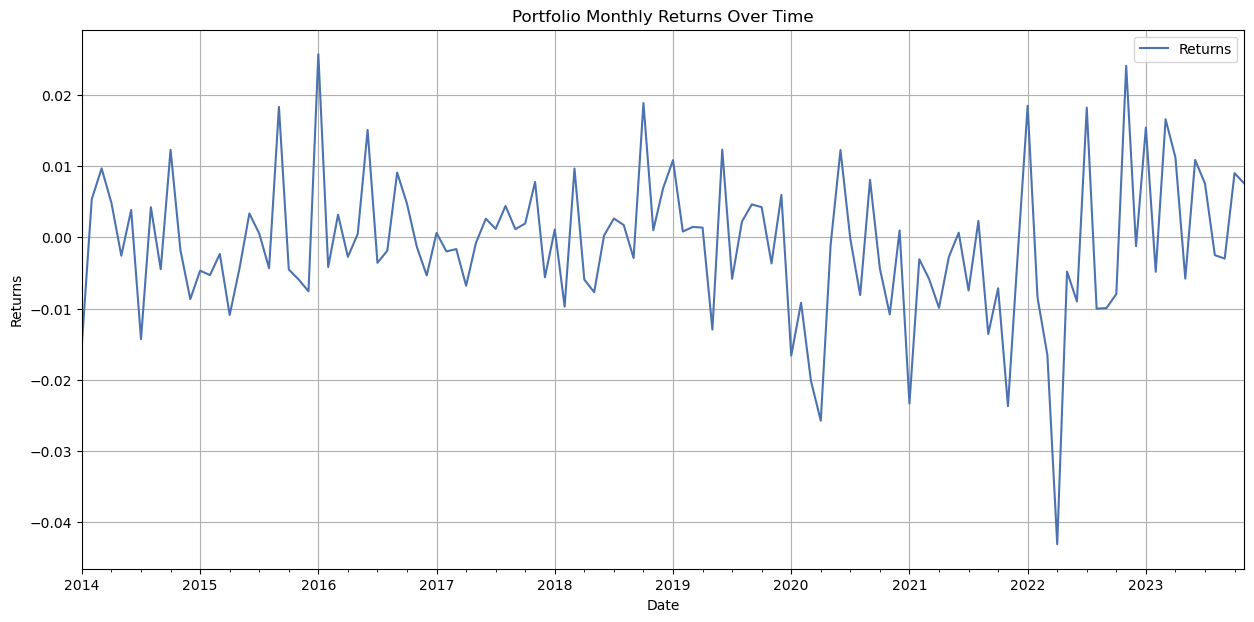

In [13]:
# Assuming final_data is defined
ret_data = df[["RET", "TICKER", "date"]].copy()  # Create a copy to work on to avoid affecting original data

# Create equal weights safely using loc
ret_data['eq_weights'] = 1 / ret_data.groupby('date')['TICKER'].transform('size')

# Calculate monthly return of the equally weighted portfolio containing all stocks
# Use loc to ensure the operation is directly on the DataFrame
ret_data.loc[:, 'return_stock_ew'] = ret_data['RET'].astype(float) * ret_data['eq_weights']

# Calculate the total returns for each date
ret_data.loc[:, 'Returns'] = ret_data.groupby('date')['return_stock_ew'].transform('sum')

# Drop duplicates and set index
unique_ret_data = ret_data[['date', 'Returns']].drop_duplicates().set_index('date')

# Plot the portfolio returns over time
unique_ret_data.plot(grid=True, figsize=(15, 7))
plt.title('Portfolio Monthly Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)

# Save the graph
plt.show()

# 5. Feature Engineering and Preprocessing

In [34]:
def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""graph TD
    A[Input] --> B[Stock Data]
   subgraph "Feature Engineering"
        B --> F[Calculate Momentum, Volatility, etc.]
    end
    A --> C[Financial Report Data]
    A --> D[Macroeconomic Indicators]
    F & C & D --> G[Merge Datasets]
   
   subgraph "Preprocessing Pipeline"
        G --> J[Handle NaN & Set Index]
        J --> K[Handle Missing Values]
        K --> L[Normalization]
        L --> M[Feature Lagging]
    end
   
   subgraph "Feature Selection Pipeline"
        M --> O[Select K Best Features]
        O --> P[Reduce Multicollinearity by Lasso etc]
    end
    
    P --> N[Merge with Return Ratio as Target]
    N --> Q[Output Preprocessed Data]
   """)

Data Import

- Import stock data (includes return ratio, price and volume information)
- Import financial report data (contains balance sheet, income statement, and cash flow data)
- Import macroeconomic indicators (treasury bill rate,  term spread, default spread)


Feature Engineering

- Calculate technical indicators using stock data, such as:

    - Momentum (captures price trends)
    - Beta, Idiosyncratic Volatility (measures price fluctuations)
    - Other potential indicators 

Data Merging

- Combine stock data, financial report data, macroeconomic indicators, and calculated features into a comprehensive dataset
- We resample the data in 2 ways, to a monthly frequency and a daily frequency
- This step ensures all relevant information is available for analysis


Preprocessing Pipeline

- Handle NaN values and set index (crucial for time series data)
- Address missing values (using methods like imputation or interpolation)
- Normalize data (to ensure all features are on a comparable scale)
- Feature lagging (creates time-shifted versions of features, important for predictive modeling in time series)


Feature Selection Pipeline

- Select K best features (reduces dimensionality and focuses on most informative features)
- Reduce multicollinearity using methods like Lasso regression (improves model stability and interpretability)
- Use heatmap to visualize feature correlation and identify potential issues
- This step helps in creating a more robust and efficient model


Final Preparation

- Merge processed features with return ratio as the target variable
- At this point, the data is ready for model training

In [42]:
import logging

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

# Create a console handler
print(f"Handler numbers: {len(logger.handlers)}")
logger.handlers = []
logger.addHandler(logging.StreamHandler())

print("\nHandler numbers after cleaning:")
logger.info("This is a test log message")
print(f"Handler numbers: {len(logger.handlers)}")


This is a test log message


Handler numbers: 0

Handler numbers after cleaning:
Handler numbers: 1


In [43]:
class ColumnTrackerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, func):
        self.func = func
        self.columns = None

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed, self.columns = self.func(X)
        print("Columns tracked by ColumnTrackerTransformer:", self.columns)
        return pd.DataFrame(X_transformed, columns=self.columns)

    def get_feature_names_out(self, input_features=None):
        return self.columns
    
    
class DebugTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, step_name):
        self.step_name = step_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        print(f"\nAfter {self.step_name}:")
        print(f"Type: {type(X)}")
        print(f"Shape: {X.shape if hasattr(X, 'shape') else 'N/A'}")
        
        if isinstance(X, pd.DataFrame):
            print(f"Columns: {X.columns.tolist()}")
            print(f"Index: {X.index.names}")
            print(f"Sample data:\n{X.head()}")
        elif isinstance(X, np.ndarray):
            print("NumPy array - first few rows:")
            print(X[:5])
        else:
            print(f"Unrecognized type: {type(X)}")
            print("Unable to display sample data")

        print("\n" + "="*50 + "\n")
        
        missing_values = X.isnull().sum()
        print(missing_values[missing_values > 0])

        return X

class NaNHandler(BaseEstimator, TransformerMixin):

    """Exclude columns with more than 80% missing values"""

    def __init__(self, columns_to_exclude=['date', 'TICKER'], min_data_completeness=0.8):
        self.columns_to_exclude = columns_to_exclude
        self.min_data_completeness = min_data_completeness

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()

        # Filter out columns that have too many missing values
        columns_to_check = [col for col in X.columns if col not in self.columns_to_exclude]
        data_completeness = X_transformed[columns_to_check].notna().mean(axis=1)

        # Only save rows with data completeness above the threshold
        valid_rows = data_completeness >= self.min_data_completeness 
        X_filtered = X_transformed[valid_rows]

        if 'TICKER' in X_transformed.columns:
            removed_tickers = X_transformed.loc[~valid_rows, 'TICKER'].unique()
            logger.info(f"Excluded tickers due to insufficient data: {removed_tickers.tolist()}")
         
        # Trace the number of rows removed
        removed_rows = (~valid_rows).sum()
        logger.info(f"Removed {removed_rows} rows due to insufficient data")

        return X_filtered
    
class SetIndexTransformer(BaseEstimator, TransformerMixin):

    """Set the index of a DataFrame to the specified columns."""

    def __init__(self, index_columns=['date', 'TICKER']):
        self.index_columns = index_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.set_index(self.index_columns)
    
class MissingValueHandler(BaseEstimator, TransformerMixin):

    """
    This class handles missing values in a DataFrame using different methods for various types of financial data:

    1. Group Variables:
       - Historical and short-term data: Forward and backward fill within each ticker group, then fill remaining NaNs with median.
       - Long-term, short-term, and beta data: Fill NaNs with industry (SICCD) median, then overall median.
       - Trading data: Handled in the general case (see point 5).

    2. Special Cases:
       - SUV (Standardized Unexpected Volume): Fill NaNs with 0.
       - Momentum: Fill NaNs with industry mean, then overall median.

    3. Volatility Indicators (Beta, BetaSquared, idio_vol):
       Fill NaNs with industry median, then overall median.

    4. 52-week High and Related:
       - Use 3-month and 1-month high prices to estimate missing values.
       - Forward fill within ticker groups (limited to 3 periods).
       - Use current price as a last resort.

    5. Remaining Variables:
       - Numeric: Fill NaNs with industry median, then overall median.
       - Categorical: Fill NaNs with industry mode, then mode of corresponding ticker.

    This approach aims to preserve time-series and cross-sectional relationships in the data while handling missing values.
    Industry-based filling accounts for sector-specific characteristics, and using medians helps mitigate the impact of outliers.
    """

    def __init__(self):
        self.group_vars = {
            'historical': ['Momentum', 'r12_2', 'r12_7', 'r36_13', 'ShortTermReversal', 'LME', 'LTurnover', 'r2_1', 'RET_lag_1_mon'],
            'trading': ['DollarVolume', 'spread'],
            'long_term': ['Momentum', 'r12_2', 'r12_7', 'r36_13'],
            'short_term': ['ShortTermReversal', 'LME', 'LTurnover', 'r2_1'],
            'beta': ['Beta', 'BetaSquared', 'idio_vol']
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, tuple):
            df, _ = X
        else:
            df = X
        df = df.copy()
        df = df.replace([np.inf, -np.inf], np.nan)
        print("Initial shape of df:", df.shape)
        print("Initial columns in df:", df.columns)
        
        processing_steps = [
            ('_handle_group_vars', self._handle_group_vars),
            ('_handle_special_cases', self._handle_special_cases),
            ('_handle_voltality', self._handle_voltality),
            ('_handle_52_week_high', self._handle_52_week_high),
            ('_handle_remaining', self._handle_remaining)
        ]
        
        for step_name, step_func in processing_steps:
            try:
                df = step_func(df)
                if df is None:
                    print(f"Error: DataFrame became None after {step_name}")
                    return X  # Return original DataFrame if any step fails
                print(f"Shape after {step_name}:", df.shape)
            except Exception as e:
                print(f"Error in {step_name}: {str(e)}")
                return X  # Return original DataFrame if any step fails
        
        print("Final shape of df:", df.shape)
        return df
    
    def _handle_group_vars(self, df):
        for group, vars in self.group_vars.items():
            if group in ['historical', 'short_term']:
                # 使用 transform 而不是 apply
                df[vars] = df.groupby(level='TICKER')[vars].transform(lambda x: x.ffill().bfill())
            
            df[vars] = df[vars].fillna(df[vars].median())
            
            if group in ['long_term', 'short_term', 'beta']:
                for var in vars:
                    df[var] = df.groupby('SICCD')[var].transform(lambda x: x.fillna(x.median()))
                    df[var] = df[var].fillna(df[var].median())
        
        return df

    def _handle_special_cases(self, df):
        if df is None:
            print("Error: df is None in _handle_special_cases")
            return None
    
        print("Shape of df in _handle_special_cases:", df.shape)
        print("Columns in df:", df.columns)
        
        try:
            # Check if required columns exist
            required_columns = ['SUV', 'Momentum', 'SICCD']
            for col in required_columns:
                if col not in df.columns:
                    print(f"Error: Column '{col}' not found in DataFrame")
                    return None
            
            # Handle SUV
            df['SUV'] = df['SUV'].fillna(0)
            
            # Handle Momentum
            if df['SICCD'].nunique() > 0:
                df['Momentum'] = df.groupby('SICCD')['Momentum'].transform(lambda x: x.fillna(x.mean()))
            else:
                print("Warning: 'SICCD' column is empty or all values are NaN")
            df['Momentum'] = df['Momentum'].fillna(df['Momentum'].median())
            
            print("Shape of df at the end of _handle_special_cases:", df.shape)
            return df
        except Exception as e:
            print(f"Error in _handle_special_cases: {str(e)}")
            return None

    def _handle_voltality(self, df):
        if df is None or df.empty:
            print("Error: DataFrame is None or empty in _handle_beta")
            return df

        try:
            # Use indusial volatility to fill missing values for Beta, BetaSquared, and idio_vol
            beta_indicators = ['Beta', 'BetaSquared','idio_vol']
            for indicator in beta_indicators:
                df[indicator] = df.groupby('SICCD')[indicator].transform(lambda x: x.fillna(x.median()))
            
            # Use median of the industry to fill missing values for Beta, BetaSquared, and idio_vol
            for indicator in beta_indicators:
                df[indicator] = df[indicator].fillna(df[indicator].median())
            
            print(f"Beta calculation completed. New DataFrame shape: {df.shape}")
            return df
        except Exception as e:
            print(f"Error in Beta calculation: {str(e)}")
            return None

    def _handle_52_week_high(self, df):
        if df is None:
            print("Error: df is None in _handle_52_week_high")
            return None

        print("Shape of df in _handle_52_week_high:", df.shape)
        print("Columns in df:", df.columns)

        # Use 3-month and 1-month high to fill missing values for 52_week_high and Rel_to_high
        df_temp = pd.DataFrame(index=df.index)

        # Calculate 3-month high and 1-month high
        df_temp['3_month_high'] = df.groupby(level='TICKER')['PRC'].transform(lambda x: x.rolling(window=63).max())
        df_temp['Rel_to_3month_high'] = df['PRC'] / df_temp['3_month_high']

        df_temp['1_month_high'] = df.groupby(level='TICKER')['PRC'].transform(lambda x: x.rolling(window=21).max())
        df_temp['Rel_to_1month_high'] = df['PRC'] / df_temp['1_month_high']

        # Fill missing values for 52_week_high and Rel_to_high
        for col in ['52_week_high', 'Rel_to_high']:
            df[col] = df.groupby(level='TICKER')[col].transform(lambda x: x.ffill(limit=3))

        # If still missing, use 3-month and 1-month high to fill
        df['52_week_high'] = df['52_week_high'].fillna(df_temp['3_month_high'])
        df['Rel_to_high'] = df['Rel_to_high'].fillna(df_temp['Rel_to_3month_high'])

        df['52_week_high'] = df['52_week_high'].fillna(df_temp['1_month_high'])
        df['Rel_to_high'] = df['Rel_to_high'].fillna(df_temp['Rel_to_1month_high'])

        df['52_week_high'] = df['52_week_high'].fillna(df['PRC'])
        df['Rel_to_high'] = df['Rel_to_high'].fillna(1)

        return df

    def _handle_remaining(self, df):
        if df is None:
            print("Error: df is None in _handle_remaining")
            return None
        
        print("Shape of df at the start of _handle_remaining:", df.shape)
        print("Columns in df:", df.columns)

        try:
            numeric_cols = df.select_dtypes(include=[np.number]).columns
            categorical_cols = df.select_dtypes(exclude=[np.number]).columns

            for col in numeric_cols:
                if df[col].isna().any():
                    df[col] = df.groupby('SICCD')[col].transform(lambda x: x.fillna(x.median()))
                    df[col] = df[col].fillna(df[col].median())

            for col in categorical_cols:
                if df[col].isna().any():
                    df[col] = df.groupby('SICCD')[col].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))
                    df[col] = df[col].fillna(df[col].mode().iloc[0] if not df[col].mode().empty else 'Unknown')

            print("Shape of df at the end of _handle_remaining:", df.shape)
            return df
        except Exception as e:
            print(f"Error in _handle_remaining: {str(e)}")
            return df  # Return the original df even if there's an error

class LaggerTransformer(BaseEstimator, TransformerMixin):
    '''''
    This class is used to lag the features by 1 month for the monthly features and 6 months for the others.
    '''''
    def __init__(self, monthly_features):
        self.monthly_features = monthly_features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lagged_features = {}
        for var in X.columns:
            if var in self.monthly_features:
                lagged_features[var] = X[var].groupby(X.index.get_level_values('TICKER')).shift(1)
            else:
                lagged_features[var] = X[var].groupby(X.index.get_level_values('TICKER')).shift(6)
        
        result = pd.DataFrame(lagged_features, index=X.index)
        result = result.dropna()
        return result
    
    
class FeatureSelector(BaseEstimator, TransformerMixin):
    '''''
    This class is used to select only the numeric features.
    '''''
    def __init__(self, categorical_features):
        self.columns_to_drop = categorical_features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        
        columns_to_keep = [col for col in X.columns if col not in self.columns_to_drop]
        
        logger.info(f"Original columns: {X.columns.tolist()}")
        logger.info(f"Columns being dropped: {self.columns_to_drop}")
        logger.info(f"Columns being kept: {columns_to_keep}")
        
        return X[columns_to_keep]

        
    
def create_preprocessing_pipeline(df):
    # Define feature groups
    minmax_cols = ['CAPEI', 'bm', 'evm', 'pe_op_basic', 'pe_op_dil', 'pe_exi', 'pe_inc', 'dpr', 'npm', 
                   'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm', 'roa', 'roe', 'roce', 'efftax']
    log_standard_cols = ['ps', 'pcf', 'debt_ebitda', 'lt_ppent', 'dltt_be', 'debt_assets', 'debt_capital', 'de_ratio']
    yeojohnson_cols = ['aftret_eq', 'aftret_invcapx', 'aftret_equity', 'pretret_noa', 'pretret_earnat', 'GProf']
    ratio_cols = ['equity_invcap', 'debt_invcap', 'totdebt_invcap', 'capital_ratio']
    turn_cols = ['inv_turn', 'at_turn', 'rect_turn', 'pay_turn', 'cash_conversion']
    quantile_cols = ['intcov', 'intcov_ratio', 'cash_ratio', 'quick_ratio', 'curr_ratio', 'sale_invcap', 'sale_equity', 'sale_nwc']
    robust_cols = ['int_debt', 'int_totdebt', 'cash_lt', 'invt_act', 'rect_act', 'debt_at', 'short_debt', 'curr_debt', 'lt_debt', 
                   'profit_lct', 'ocf_lct', 'cash_debt', 'fcf_ocf', 'rd_sale', 'adv_sale', 'staff_sale', 'accrual', 'ptb', 'PEG_trailing', 'divyield',
                   'r2_1', 'r12_2', 'r12_7', 'Volatility', 'SUV', '52_week_high', 'Rel_to_high']
    min_max_features = ['vwretd', 'ewretd', 'sprtrn', 'Beta', 'BetaSquared', 'idio_vol', 'spread', 'Size',
                        'Momentum', 'ShortTermReversal', 'LME', 'LTurnover']
    z_score_features = ['PRC', 'VOL', 'SHROUT', 'BIDLO', 'ASKHI', 'OPENPRC', 'market_cap', 'TB3MS', 'T10Y2Y', 'BAA10Y', 'DollarVolume']

    # Identify categorical features
    categorical_features = ['COMNAM', 'SHRCD', 'EXCHCD', 'SICCD']

    # Define non-annual features for lagging
    monthly_features = [
        'Size', 'Momentum', 'r2_1', 'r12_2', 'r12_7',
        'ShortTermReversal', 'DollarVolume', 'spread', 'idio_vol',
        'Beta', 'BetaSquared', 'Volatility', 'SUV',
        '52_week_high', 'Rel_to_high', 'TB3MS', 'T10Y2Y', 'BAA10Y',
        'vwretd', 'ewretd', 'sprtrn', 'LME', 'LTurnover'
    ]

    class DataFrameColumnTransformer(ColumnTransformer):
        '''''
        This is a custom class that inherits from ColumnTransformer 
        and adds the ability to return the feature names of the transformed data.
        '''''
        def __init__(self, transformers, remainder='drop', sparse_threshold=0.3,
                    n_jobs=None, transformer_weights=None, verbose=False,
                    verbose_feature_names_out=True):
            super().__init__(
                transformers=transformers, remainder=remainder,
                sparse_threshold=sparse_threshold, n_jobs=n_jobs,
                transformer_weights=transformer_weights, verbose=verbose,
                verbose_feature_names_out=verbose_feature_names_out

            )

        def fit_transform(self, X, y=None):
            result = super().fit_transform(X)
            self.feature_names_out_ = self.get_feature_names_out()
            return pd.DataFrame(result, columns=self.feature_names_out_, index=X.index)

        def transform(self, X):
            result = super().transform(X)
            return pd.DataFrame(result, columns=self.feature_names_out_, index=X.index)
        
    class LogTransformer(BaseEstimator, TransformerMixin):
        '''''
        This is a custom class that transforms the specified columns of a DataFrame to their natural logarithm.
        '''''
        def __init__(self, log_standard_cols, log_offset=1e-8):
            self.log_standard_cols = log_standard_cols
            self.log_offset = log_offset
            self.scalers = {}


        def fit(self, X, y=None):
            for col in self.log_standard_cols:
                self.scalers[col] = StandardScaler()
                self.scalers[col].fit(np.log1p(X[col].clip(lower=self.log_offset)).values.reshape(-1, 1))
            return self

        def transform(self, X):
            X_transformed = pd.DataFrame(index=X.index)

            for col in self.log_standard_cols:
                X_transformed[col] = self.scalers[col].transform(
                    np.log1p(X[col].clip(lower=self.log_offset)).values.reshape(-1, 1)
                )

            return X_transformed

        def get_feature_names_out(self, input_features=None):
            if input_features is None:
                raise ValueError("input_features should be provided.")
            return np.array([f"{feature}" for feature in input_features])
    
    # Create the preprocessor
    preprocessor = DataFrameColumnTransformer(
        transformers=[
            ('minmax', MinMaxScaler(), minmax_cols),
            ('log_standard', Pipeline([
                ('log', LogTransformer(log_standard_cols)),
                ('scaler', StandardScaler())
            ]), log_standard_cols),
            ('yeojohnson', PowerTransformer(method='yeo-johnson'), yeojohnson_cols),
            ('ratio', MinMaxScaler(feature_range=(0.001, 0.999)), ratio_cols),
            ('turn', PowerTransformer(method='yeo-johnson'), turn_cols),
            ('quantile', QuantileTransformer(output_distribution='normal'), quantile_cols),
            ('robust', RobustScaler(), robust_cols),
            ('minmax_features', MinMaxScaler(), min_max_features),
            ('z_score', StandardScaler(), z_score_features),
            # ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ],
        remainder='passthrough',
        verbose_feature_names_out=False
    )
    
    # Create the full pipeline
    full_pipeline = Pipeline([
        ('nan_handler', NaNHandler()),
        ('debug_nan', DebugTransformer('nan_handler')),

        ('set_index', SetIndexTransformer()),
        ('debug_0', DebugTransformer('set_index')),

        ('missing_value_handler', MissingValueHandler()),
        ('debug_2', DebugTransformer('missing_value_handler')),

        ('preprocessor', preprocessor),
        ('debug_3', DebugTransformer('preprocessor')),

        ('lagger', LaggerTransformer(monthly_features)),
        ('debug_5', DebugTransformer('feature_lagger')),

        ('feature_selector', FeatureSelector(categorical_features)),
        ('debug_4', DebugTransformer('feature_selector')),

    ])
    
    return full_pipeline





In [44]:
# Create the pipeline
X_df = pd.read_csv('check_daily_combined_data_after_handle_missing_values.csv')
columns_to_drop = ['Unnamed: 0', 'level_0', 'index']
X_df = X_df.drop(columns=[col for col in columns_to_drop if col in X_df.columns])

X_df['date'] = pd.to_datetime(X_df['date'])
X_df.sort_index(inplace=True)

preprocessing_pipeline = create_preprocessing_pipeline(X_df)
X_preprocessed = preprocessing_pipeline.fit_transform(X_df)

# Extract the target variable
y_preprocessed = X_df.copy().set_index(['date', 'TICKER'])['RET']

# Filter the data to only include the common index
common_index = X_preprocessed.index.intersection(y_preprocessed.index)
X_preprocessed = X_preprocessed.loc[common_index]
y_preprocessed = y_preprocessed.loc[common_index]

print(X_preprocessed.head())
print(y_preprocessed.head())

X_preprocessed.to_csv('X_preprocessed.csv')
y_preprocessed.to_csv('y_preprocessed.csv')

/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_4431/1458463567.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  X_df = pd.read_csv('check_daily_combined_data_after_handle_missing_values.csv')
Excluded tickers due to insufficient data: ['AAPL', 'ALLY', 'AMZN', 'AON', 'AXP', 'BAC', 'BYI', 'C', 'CB', 'CBS', 'CHTR', 'COF', 'CVX', 'DVA', 'ES', 'FND', 'FWONK', 'ITG', 'JEF', 'KHC', 'KO', 'KR', 'LLYVK', 'LPX', 'LSXMA', 'LSXMK', 'LUK', 'MA', 'MCO', 'NU', 'NVR', 'OXY', 'PARA', 'SIRI', 'SNOW', 'TMUS', 'V', 'VIAC', 'VRSN']
Removed 15964 rows due to insufficient data



After nan_handler:
Type: <class 'pandas.core.frame.DataFrame'>
Shape: (87035, 108)
Columns: ['TICKER', 'date', 'COMNAM', 'SHRCD', 'EXCHCD', 'SICCD', 'PRC', 'VOL', 'RET', 'SHROUT', 'BIDLO', 'ASKHI', 'OPENPRC', 'vwretd', 'ewretd', 'sprtrn', 'market_cap', 'Size', 'Momentum', 'ShortTermReversal', 'LME', 'LTurnover', 'DollarVolume', 'spread', 'Volatility', 'Beta', 'BetaSquared', 'idio_vol', 'r2_1', 'r12_2', 'r12_7', 'r36_13', 'RET_lag_1_mon', '52_week_high', 'Rel_to_high', 'SUV', 'CAPEI', 'bm', 'evm', 'pe_op_basic', 'pe_op_dil', 'pe_exi', 'pe_inc', 'ps', 'pcf', 'dpr', 'npm', 'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm', 'roa', 'roe', 'roce', 'efftax', 'aftret_eq', 'aftret_invcapx', 'aftret_equity', 'pretret_noa', 'pretret_earnat', 'GProf', 'equity_invcap', 'debt_invcap', 'totdebt_invcap', 'capital_ratio', 'int_debt', 'int_totdebt', 'cash_lt', 'invt_act', 'rect_act', 'debt_at', 'debt_ebitda', 'short_debt', 'curr_debt', 'lt_debt', 'profit_lct', 'ocf_lct', 'cash_debt', 'fcf_ocf', 'lt_ppent', 'dltt_

Original columns: ['CAPEI', 'bm', 'evm', 'pe_op_basic', 'pe_op_dil', 'pe_exi', 'pe_inc', 'dpr', 'npm', 'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm', 'roa', 'roe', 'roce', 'efftax', 'ps', 'pcf', 'debt_ebitda', 'lt_ppent', 'dltt_be', 'debt_assets', 'debt_capital', 'de_ratio', 'aftret_eq', 'aftret_invcapx', 'aftret_equity', 'pretret_noa', 'pretret_earnat', 'GProf', 'equity_invcap', 'debt_invcap', 'totdebt_invcap', 'capital_ratio', 'inv_turn', 'at_turn', 'rect_turn', 'pay_turn', 'cash_conversion', 'intcov', 'intcov_ratio', 'cash_ratio', 'quick_ratio', 'curr_ratio', 'sale_invcap', 'sale_equity', 'sale_nwc', 'int_debt', 'int_totdebt', 'cash_lt', 'invt_act', 'rect_act', 'debt_at', 'short_debt', 'curr_debt', 'lt_debt', 'profit_lct', 'ocf_lct', 'cash_debt', 'fcf_ocf', 'rd_sale', 'adv_sale', 'staff_sale', 'accrual', 'ptb', 'PEG_trailing', 'divyield', 'r2_1', 'r12_2', 'r12_7', 'Volatility', 'SUV', '52_week_high', 'Rel_to_high', 'vwretd', 'ewretd', 'sprtrn', 'Beta', 'BetaSquared', 'idio_vol', 'spread', 


After feature_lagger:
Type: <class 'pandas.core.frame.DataFrame'>
Shape: (86807, 106)
Columns: ['CAPEI', 'bm', 'evm', 'pe_op_basic', 'pe_op_dil', 'pe_exi', 'pe_inc', 'dpr', 'npm', 'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm', 'roa', 'roe', 'roce', 'efftax', 'ps', 'pcf', 'debt_ebitda', 'lt_ppent', 'dltt_be', 'debt_assets', 'debt_capital', 'de_ratio', 'aftret_eq', 'aftret_invcapx', 'aftret_equity', 'pretret_noa', 'pretret_earnat', 'GProf', 'equity_invcap', 'debt_invcap', 'totdebt_invcap', 'capital_ratio', 'inv_turn', 'at_turn', 'rect_turn', 'pay_turn', 'cash_conversion', 'intcov', 'intcov_ratio', 'cash_ratio', 'quick_ratio', 'curr_ratio', 'sale_invcap', 'sale_equity', 'sale_nwc', 'int_debt', 'int_totdebt', 'cash_lt', 'invt_act', 'rect_act', 'debt_at', 'short_debt', 'curr_debt', 'lt_debt', 'profit_lct', 'ocf_lct', 'cash_debt', 'fcf_ocf', 'rd_sale', 'adv_sale', 'staff_sale', 'accrual', 'ptb', 'PEG_trailing', 'divyield', 'r2_1', 'r12_2', 'r12_7', 'Volatility', 'SUV', '52_week_high', 'Rel_to_high

In [45]:

# Define the pipeline with feature selection methods
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k=50)),
    ('lasso', Lasso(alpha=0.0002))  # alpha value could be tuned using cross-validation in the future
])

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_preprocessed, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Extract the selected features
selected_k_best_features = X_preprocessed.columns[pipeline.named_steps['feature_selection'].get_support()]
print("Selected features by SelectKBest:")
print(selected_k_best_features)

# Extract the coefficients from the Lasso model
lasso_coef = pipeline.named_steps['lasso'].coef_
feature_importance = dict(zip(selected_k_best_features, lasso_coef))
print("\nFeature importance (Lasso coefficients):")
for feature, importance in sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True):
    if importance != 0:  
        print(f"{feature}: {importance}")

# Filter and leave only the features with non-zero coefficients
lasso_selected = abs(lasso_coef) > 0
num_selected_features = np.sum(lasso_selected)
print(f"\nNumber of selected features by Lasso: {num_selected_features}")

# Extract the selected features based on Lasso
lasso_selected_features = selected_k_best_features[lasso_selected]

# Use selected features for training and testing
features = X_preprocessed[lasso_selected_features]
target = y_preprocessed



Mean Squared Error: 0.0002876078073699193
R-squared Score: 0.1375453979489616
Selected features by SelectKBest:
Index(['bm', 'opmbd', 'opmad', 'cfm', 'roa', 'roe', 'roce', 'ps',
       'debt_ebitda', 'dltt_be', 'debt_assets', 'debt_capital', 'de_ratio',
       'aftret_invcapx', 'pretret_earnat', 'GProf', 'at_turn', 'rect_turn',
       'intcov_ratio', 'cash_ratio', 'quick_ratio', 'curr_ratio',
       'sale_invcap', 'sale_equity', 'sale_nwc', 'debt_at', 'profit_lct',
       'ocf_lct', 'cash_debt', 'adv_sale', 'accrual', 'ptb', 'divyield',
       'r2_1', 'r12_2', 'Volatility', 'SUV', 'Rel_to_high', 'spread',
       'Momentum', 'ShortTermReversal', 'LTurnover', 'VOL', 'TB3MS', 'T10Y2Y',
       'BAA10Y', 'DollarVolume', 'RET', 'r36_13', 'RET_lag_1_mon'],
      dtype='object')

Feature importance (Lasso coefficients):
cfm: -0.008905929503971228
VOL: -0.003267163227803008
SUV: -0.0019439446451892778
Rel_to_high: 0.0018514875688121933
ps: 0.001766683266887216
sale_nwc: 0.0017213964180631286
ad

Index(['cfm', 'ps', 'dltt_be', 'debt_assets', 'de_ratio', 'aftret_invcapx',
       'pretret_earnat', 'GProf', 'intcov_ratio', 'cash_ratio', 'quick_ratio',
       'sale_equity', 'sale_nwc', 'profit_lct', 'ocf_lct', 'cash_debt',
       'adv_sale', 'accrual', 'ptb', 'r2_1', 'r12_2', 'Volatility', 'SUV',
       'Rel_to_high', 'VOL', 'TB3MS', 'BAA10Y', 'DollarVolume'],
      dtype='object')


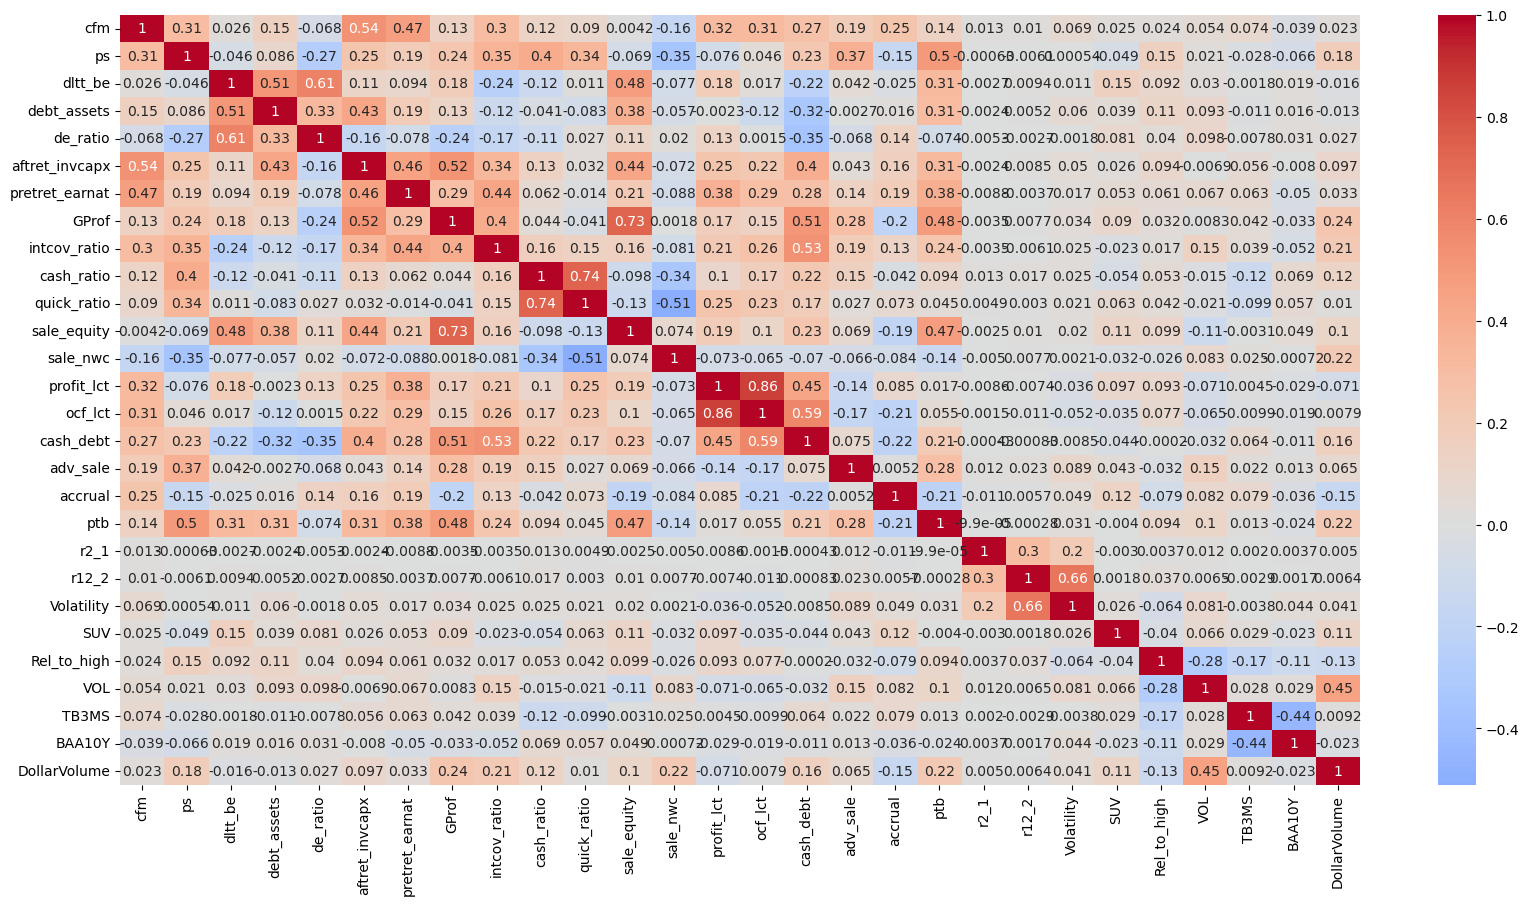

In [46]:
# Check if there is remaining multicollinerity problem using heatmap
print(features.columns)

corr_matrix = features.corr()
plt.figure(figsize=(20, 10))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)



Number of features after removing highly correlated ones: 27
Remaining features:
['cfm', 'ps', 'dltt_be', 'debt_assets', 'de_ratio', 'aftret_invcapx', 'pretret_earnat', 'GProf', 'intcov_ratio', 'cash_ratio', 'quick_ratio', 'sale_equity', 'sale_nwc', 'profit_lct', 'cash_debt', 'adv_sale', 'accrual', 'ptb', 'r2_1', 'r12_2', 'Volatility', 'SUV', 'Rel_to_high', 'VOL', 'TB3MS', 'BAA10Y', 'DollarVolume']


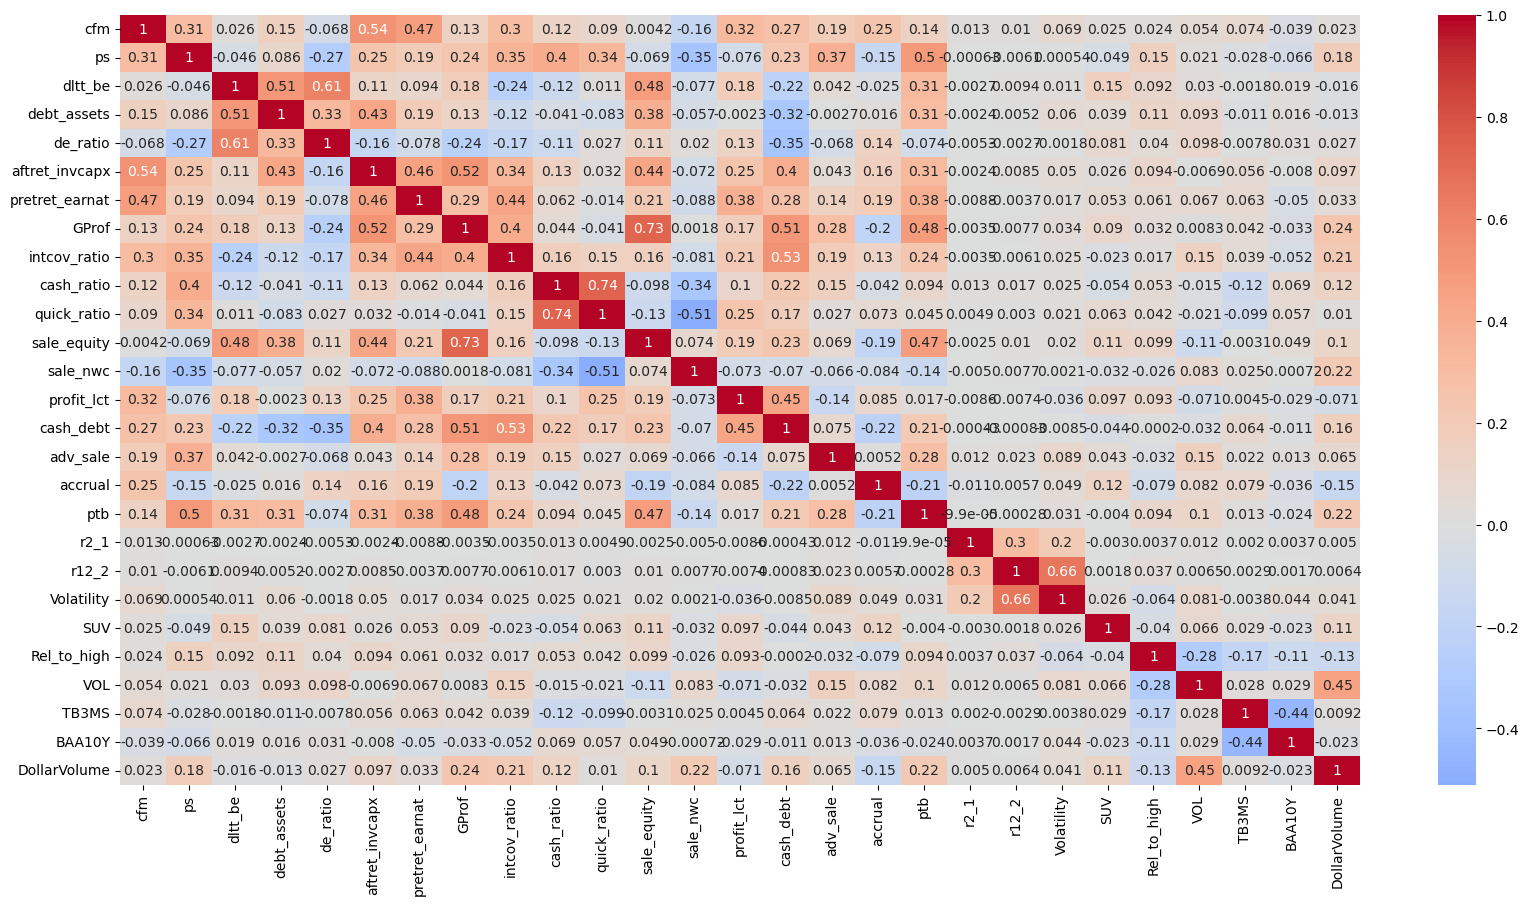

In [47]:
# Define the correlation threshold
correlation_threshold = 0.8

# Find features with correlation above the threshold
high_correlation_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            colname = corr_matrix.columns[i]
            high_correlation_features.add(colname)

# Remove highly correlated features and only keep one of them
features_to_keep = [feature for feature in lasso_selected_features if feature not in high_correlation_features]

print(f"Number of features after removing highly correlated ones: {len(features_to_keep)}")
print("Remaining features:")
print(features_to_keep)

# Keep the selected features for further analysis
features = X_preprocessed[features_to_keep]

# Check if there is remaining multicollinerity problem using heatmap
corr_matrix_final = features.corr()
plt.figure(figsize=(20, 10))
ax_final = sns.heatmap(corr_matrix_final, annot=True, cmap='coolwarm', center=0)


In [48]:
def debug_print_data_info(dataframe):
    print("Data index:", dataframe.index)
    print("Data shape:", dataframe.shape)
    print("Data head:")
    print(dataframe.head())
    print("Data tail:")
    print(dataframe.tail())
    print("Data info:")
    print(dataframe.info())
    print("Missing values:")
    print(dataframe.isnull().sum())
    print(dataframe.columns.tolist())

debug_print_data_info(features)
debug_print_data_info(pd.DataFrame(target))

Data index: MultiIndex([('2014-02-07', 'AAPL'),
            ('2014-02-10', 'AAPL'),
            ('2014-02-11', 'AAPL'),
            ('2014-02-12', 'AAPL'),
            ('2014-02-13', 'AAPL'),
            ('2014-02-14', 'AAPL'),
            ('2014-02-17', 'AAPL'),
            ('2014-02-18', 'AAPL'),
            ('2014-02-19', 'AAPL'),
            ('2014-02-20', 'AAPL'),
            ...
            ('2023-12-18', 'VRSN'),
            ('2023-12-19', 'VRSN'),
            ('2023-12-20', 'VRSN'),
            ('2023-12-21', 'VRSN'),
            ('2023-12-22', 'VRSN'),
            ('2023-12-25', 'VRSN'),
            ('2023-12-26', 'VRSN'),
            ('2023-12-27', 'VRSN'),
            ('2023-12-28', 'VRSN'),
            ('2023-12-29', 'VRSN')],
           names=['date', 'TICKER'], length=86807)
Data shape: (86807, 27)
Data head:
                      cfm        ps   dltt_be debt_assets de_ratio  \
date       TICKER                                                    
2014-02-07 AAPL    0.6289

# Predictive Analysis and Model Evaluation

Based on the work of Gu et al. Random Forests and Gradient Boosted trees perform the best for predictive analysis. We make use of TimeSeriesSplit to split our data hyperparameter tune our models for each iteration of predictions and plot our data across time. Our R2 here is terrible but the Mean Squared Error seems reasonable given the data.

In [49]:
def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""graph TD
    A[Input Data: Features and Target] --> B[Time Series Split]
    B --> C[Train-Test Split]
    C --> D[Random Forest] & E[XGBoost]
    
    subgraph "Model Training and Evaluation"
        D --> F[RF Grid Search]
        E --> G[XGB Grid Search]
        F & G --> H[Best Model Selection]
        H --> I[Predict on Test Set]
        I --> J[Calculate R² and MSE]
    end
    
    J --> K[Visualize Predictions]
    K --> L[Calculate Average MSE]
    L --> M[Choose Best Model]
    M --> N[Generate Final Predictions]
    N --> O[Output: Best Model and Predictions]
""")

Random Forest R²: -0.021646960632519363, MSE: 0.000323551001826187
XGBoost R²: -0.016323600326155763, MSE: 0.0003218651175368241


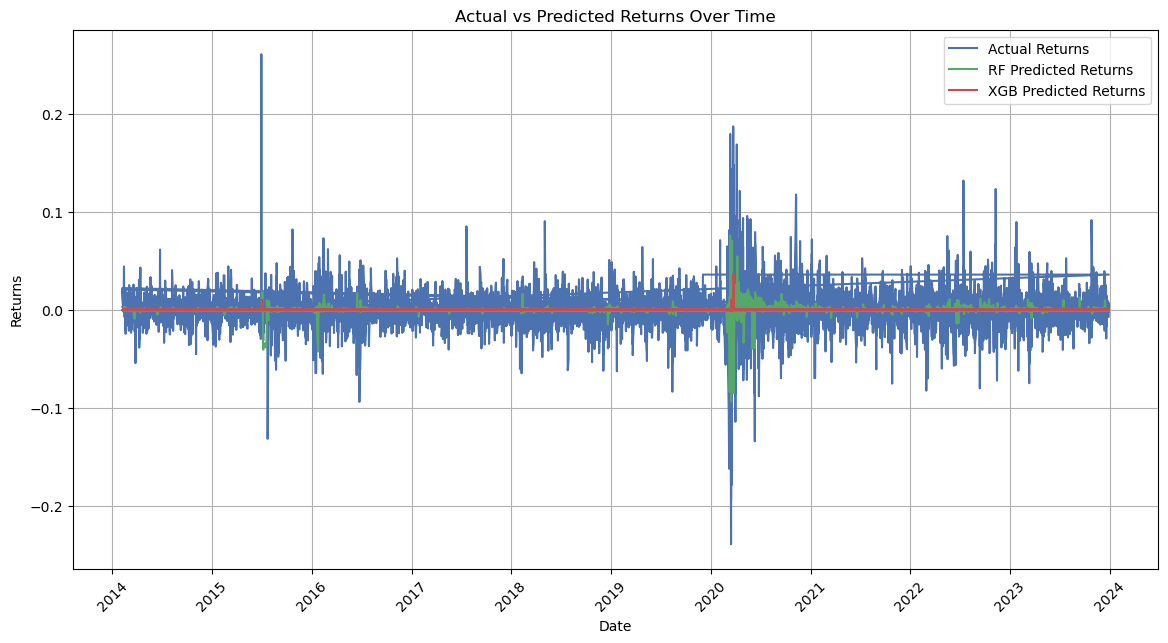

Random Forest R²: -0.030018556956833642, MSE: 6.955633371651561e-05
XGBoost R²: -0.021874246984554535, MSE: 6.90063549433212e-05


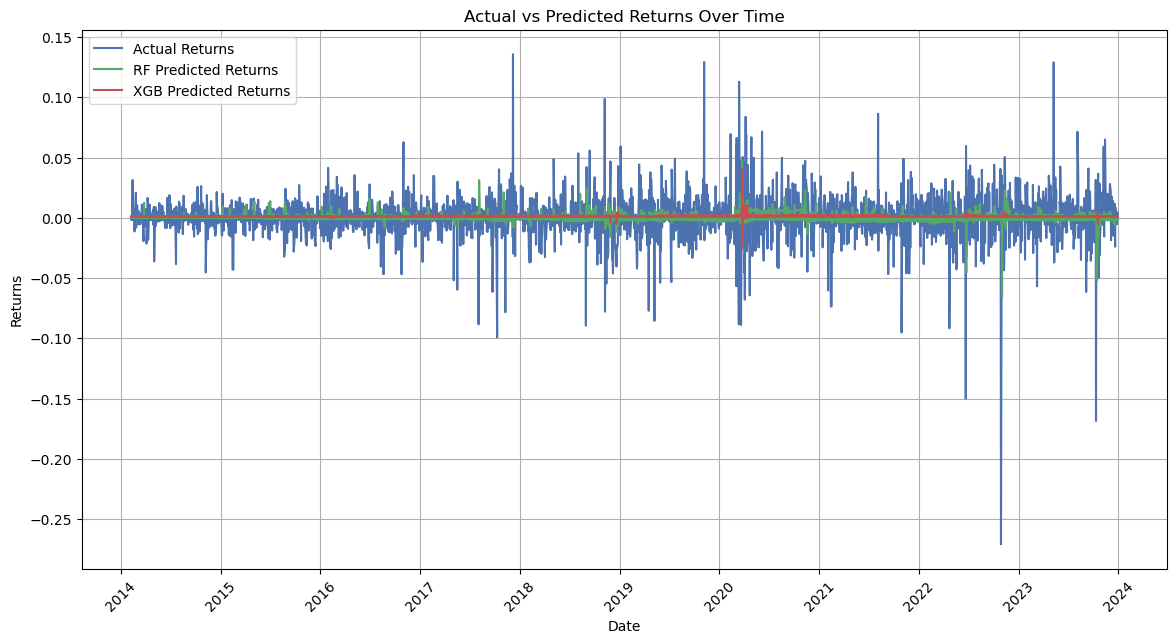

Random Forest R²: -6.09921521198495, MSE: 2.4470814740243756e-07
XGBoost R²: -15.447313467248517, MSE: 5.669347228018756e-07


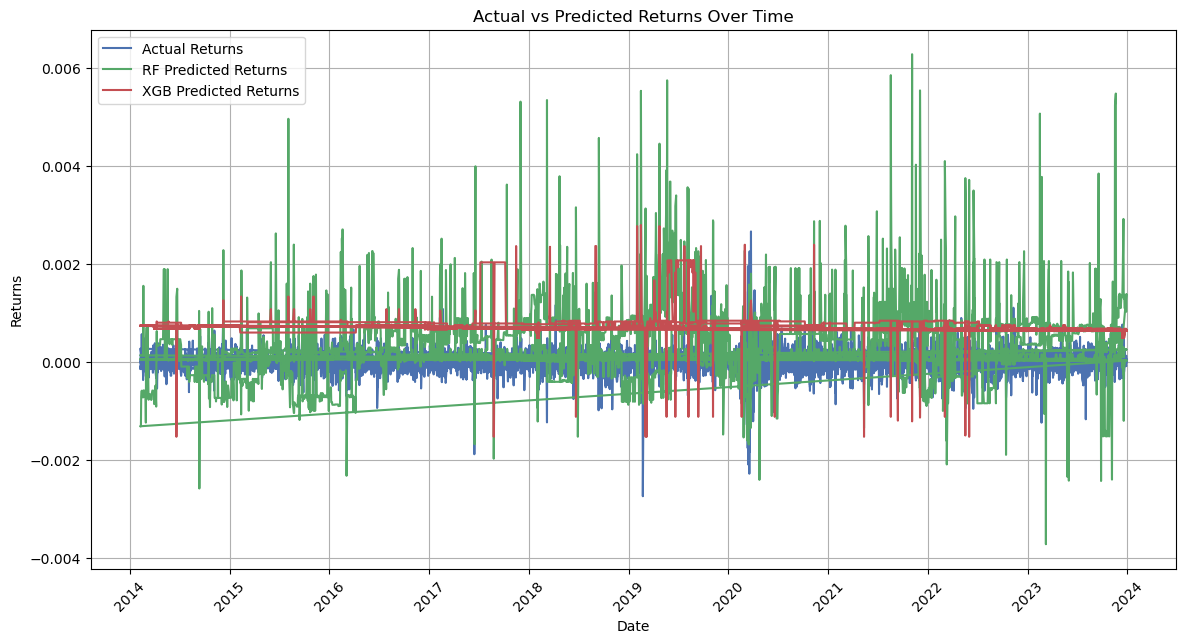

Random Forest R²: -0.03227548662093671, MSE: 0.00016863140401142125
XGBoost R²: 0.020057139154141868, MSE: 0.00016008240301853375


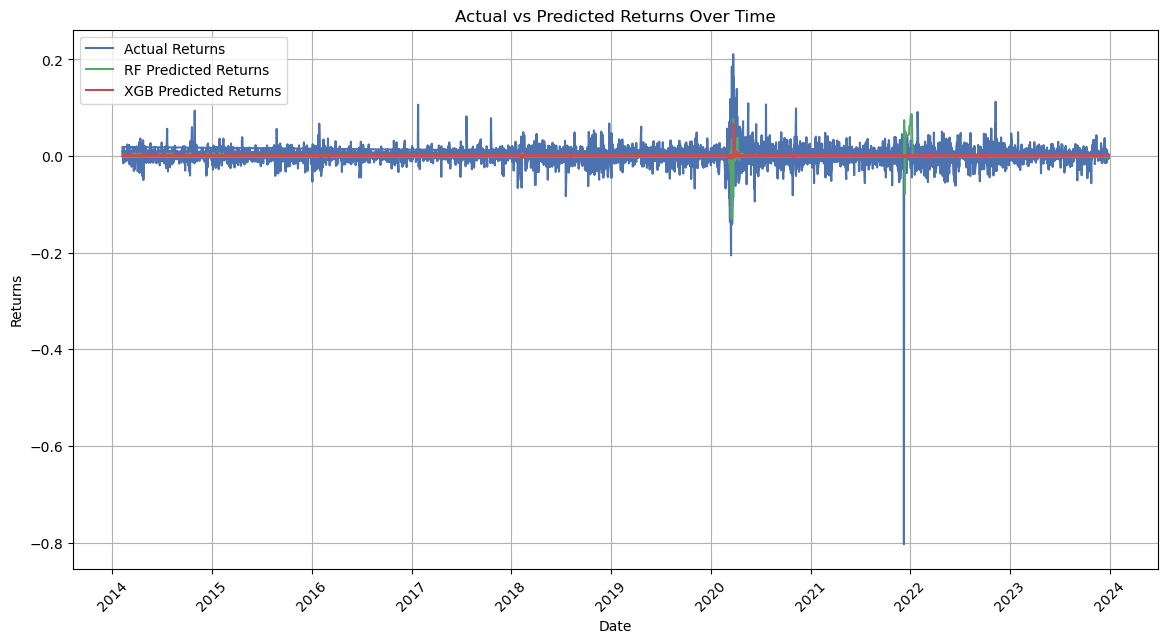

Random Forest R²: -0.0047017037447107946, MSE: 0.007900995598093671
XGBoost R²: 0.004463516579912841, MSE: 0.007828920110244384


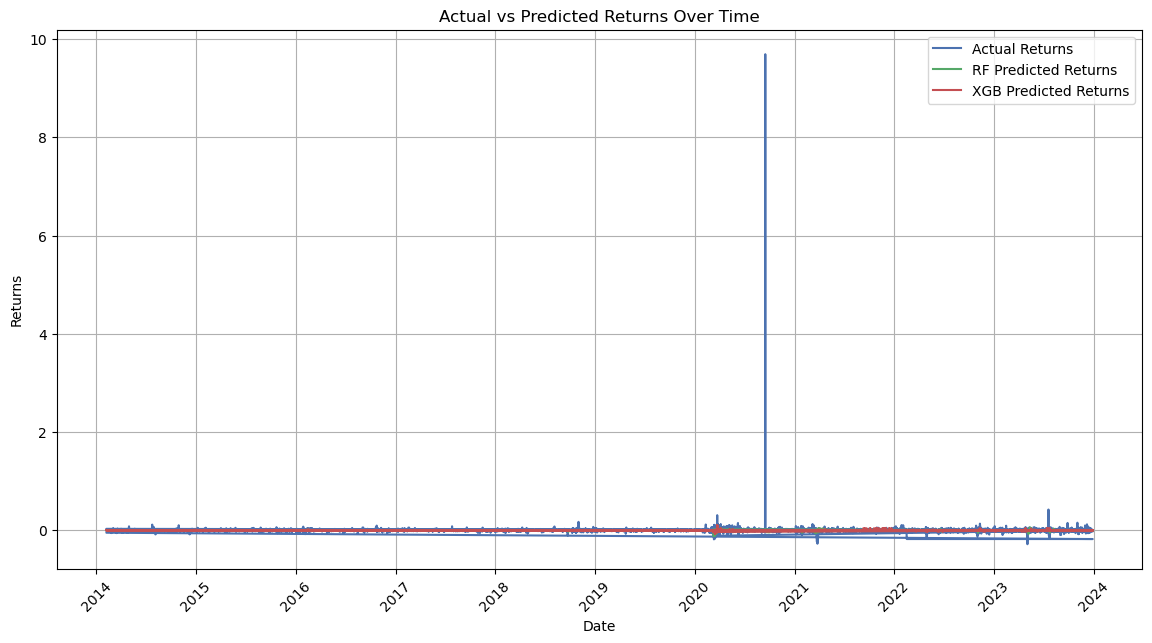

Average Random Forest MSE: 0.0016925958091590393
Average XGBoost MSE: 0.0016760881840931733
XGBoost performs better.


In [50]:
# # Define hyperparameter grids
# rf_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# xgb_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 6, 9],
#     'learning_rate': [0.01, 0.1, 0.2]
# }

def compare_models(features, target, n_splits=5, use_grid_search=False, 
                   rf_params=None, xgb_params=None, 
                   rf_param_grid=None, xgb_param_grid=None):
    
    # Default parameters if not provided, to test without grid search
    if rf_params is None:
        rf_params = {'n_estimators': 200, 'random_state': 42}
    if xgb_params is None:
        xgb_params = {'n_estimators': 200, 'random_state': 42}
    
    # Default parameter grids if not provided and grid search is used
    if use_grid_search:
        if rf_param_grid is None:
            rf_param_grid = {'n_estimators': [100, 200, 300]}
        if xgb_param_grid is None:
            xgb_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 6, 9]}
    
    dates = features.index.get_level_values('date')
    
    tscv = TimeSeriesSplit(n_splits=n_splits)
    rf_mse_list = []
    xgb_mse_list = []
    rf_predictions_all = np.zeros(len(target))
    xgb_predictions_all = np.zeros(len(target))

    for train_index, test_index in tscv.split(features):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        # Random Forest
        if use_grid_search:
            rf = RandomForestRegressor()
            rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error')
            rf_grid_search.fit(X_train, y_train)
            best_rf = rf_grid_search.best_estimator_
        else:
            best_rf = RandomForestRegressor(**rf_params)
            best_rf.fit(X_train, y_train)
        rf_predictions = best_rf.predict(X_test)
        rf_predictions_all[test_index] = rf_predictions

        # XGBoost
        if use_grid_search:
            xgb = XGBRegressor()
            xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=3, scoring='neg_mean_squared_error')
            xgb_grid_search.fit(X_train.values, y_train.values)
            best_xgb = xgb_grid_search.best_estimator_
        else:
            best_xgb = XGBRegressor(**xgb_params)
            best_xgb.fit(X_train.values, y_train.values)
        xgb_predictions = best_xgb.predict(X_test.values)
        xgb_predictions_all[test_index] = xgb_predictions

        # Compute R² and MSE
        rf_r2 = r2_score(y_test, rf_predictions)
        rf_mse = mean_squared_error(y_test, rf_predictions)
        xgb_r2 = r2_score(y_test, xgb_predictions)
        xgb_mse = mean_squared_error(y_test, xgb_predictions)

        rf_mse_list.append(rf_mse)
        xgb_mse_list.append(xgb_mse)

        print(f"Random Forest R²: {rf_r2}, MSE: {rf_mse}")
        print(f"XGBoost R²: {xgb_r2}, MSE: {xgb_mse}")

        # Visualize the Predictions
        plt.figure(figsize=(14, 7))
        plt.plot(dates[test_index], y_test, label='Actual Returns')
        plt.plot(dates[test_index], rf_predictions, label='RF Predicted Returns')
        plt.plot(dates[test_index], xgb_predictions, label='XGB Predicted Returns')
        plt.legend()
        plt.title('Actual vs Predicted Returns Over Time')
        plt.xlabel('Date')
        plt.ylabel('Returns')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()

    # Calculate average MSE for both models
    avg_rf_mse = np.mean(rf_mse_list)
    avg_xgb_mse = np.mean(xgb_mse_list)

    print(f"Average Random Forest MSE: {avg_rf_mse}")
    print(f"Average XGBoost MSE: {avg_xgb_mse}")

    # Choose the model with the lower average MSE
    if avg_rf_mse < avg_xgb_mse:
        predicted_returns = rf_predictions_all
        print("Random Forest Performs better.")
    else:
        predicted_returns = xgb_predictions_all
        print("XGBoost performs better.")

    # Convert predicted returns to a DataFrame
    predicted_returns_df = pd.DataFrame(predicted_returns, index=features.index, columns=['Predicted_RET'])
    
    return predicted_returns_df, best_rf, best_xgb

# For fast execution, we set use_grid_search to False
# rf_params = {'n_estimators': 100, 'max_depth': 10, 'random_state': 42}
# xgb_params = {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'random_state': 42}
# predicted_returns = compare_models(features, target, use_grid_search=False, rf_params=rf_params, xgb_params=xgb_params)

# # For best performance, we set use_grid_search to True
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
xgb_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 6, 9], 'learning_rate': [0.01, 0.1]}
predicted_returns, best_rf, best_xgb = compare_models(features, target, use_grid_search=True, rf_param_grid=rf_param_grid, xgb_param_grid=xgb_param_grid)

In [59]:
best_rf = predicted_returns[1]
best_xgb = predicted_returns[2]

In [60]:
def print_model_params(model_name, params, important_params):
    print(f"{model_name} best parameters:")
    for param in important_params:
        if param in params:
            print(f"  {param}: {params[param]}")
        else:
            print(f"  {param}: Not found in model parameters")
    print("\n")

# Random Forest parameters
rf_important = ['n_estimators', 'max_depth', 'min_samples_split', 
                'min_samples_leaf', 'max_features']

# XGBoost parameters
xgb_important = ['n_estimators', 'max_depth', 'learning_rate', 'subsample', 
                 'colsample_bytree', 'gamma', 'min_child_weight']

rf_params = best_rf.get_params()
xgb_params = best_xgb.get_params()

print_model_params("Random Forest", rf_params, rf_important)
print_model_params("XGBoost", xgb_params, xgb_important)


Random Forest best parameters:
  n_estimators: 50
  max_depth: 10
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: 1.0


XGBoost best parameters:
  n_estimators: 100
  max_depth: 9
  learning_rate: 0.01
  subsample: None
  colsample_bytree: None
  gamma: None
  min_child_weight: None




# Prescriptive Analysis

We make use of the PyPortfolio Optimization library for our Portfolio Optimization. The library implements best practices for a wide variety of portfolio optimization strategies, to be more specific we use:
   - Black-Litterman Method, to infer the implied returns and risk adversion from the historical data,
   - Mean Variance Optimization, to find the optimal portfolio weights, with the objective of maximizing the Sharpe Ratio

In our case. MVO is sufficient. We find that we end up taking short positions in the larger companies for which Buffet already has a substantial position, indicating a need to reduce some of his shares in those companies.

In [ ]:
def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""graph TD
    A[Input: Stock Price Over Time] --> B[Pivot Price Data]
    B --> C[Check Data Frequency]
    C --> D[Clean Price Data]
    D --> E[Calculate Historical Returns]
    D --> F[Calculate Covariance Matrix]
    E --> G[Create Efficient Frontier]
    F --> G
    G --> H[Maximize Sharpe Ratio]
    H --> I[Clean Weights]
    I --> J[Create Allotted Shares DataFrame]
    J --> K[End]

    subgraph "Data Preparation"
        B
        C
        D
    end

    subgraph "Statistical Calculations"
        E
        F
    end

    subgraph "Portfolio Optimization"
        G
        H
        I
    end

    subgraph "Result Presentation"
        J
    end
""")

In [61]:
# Black-Litterman Model for Portfolio Optimization
print("Pivoting price data...")
price_data = df.pivot(index='date', columns='TICKER', values='PRC')

# Check if the price data is monthly
frequency = pd.infer_freq(price_data.index)
print(f"The inferred frequency of the price data is: {frequency}")

# Fill missing values in price data
price_data.replace([np.inf, -np.inf], np.nan, inplace=True)
price_data.ffill(inplace=True)
price_data.bfill(inplace=True)
print("Cleaned price data:")
print(price_data)

print("Calculating historical returns and covariance matrix...")
mu = expected_returns.mean_historical_return(price_data, frequency=12)  # Specify monthly frequency
S = risk_models.CovarianceShrinkage(price_data, frequency=12).ledoit_wolf()  # Specify monthly frequency
print("Historical returns calculated:")
print(mu)
print("Covariance matrix calculated:")
print(S)

ef = EfficientFrontier(mu, S, weight_bounds=(-1,1))
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()

allottedShares = pd.DataFrame(list(cleaned_weights.items()), columns=['TICKER', 'Share'])
print("Alloted Shares:")
print(allottedShares)


Pivoting price data...
The inferred frequency of the price data is: ME
Cleaned price data:
TICKER           AAPL   ALLY       AMZN        AXP    BAC    BYI      C  \
date                                                                      
2014-01-31  500.60001  24.60  358.69000   85.02000  16.75  73.32  47.43   
2014-02-28  526.23999  24.60  362.10001   91.28000  16.53  67.75  48.63   
2014-03-31  536.73999  24.60  336.36499   90.03000  17.20  66.27  47.60   
2014-04-30  590.09003  24.60  304.13000   87.43000  15.14  65.11  47.91   
2014-05-31  633.00000  24.60  312.54999   91.50000  15.14  59.00  47.57   
...               ...    ...        ...        ...    ...    ...    ...   
2023-07-31  196.45000  30.54  133.67999  168.88000  32.00  83.27  47.66   
2023-08-31  187.87000  27.69  138.00999  157.99001  28.67  83.27  41.29   
2023-09-30  171.21001  26.68  127.12000  149.19000  27.38  83.27  41.13   
2023-10-31  170.77000  24.19  133.09000  146.03000  26.34  83.27  39.49   
2023-11-3

We achieve a sharpe ratio consistent with actual reports of Buffet's performance in recent times and visualized the Efficient Frontier of the portfolio.

# Assessment

In [62]:
# Calculate the portfolio performance
ef.portfolio_performance(verbose=True)

Expected annual return: 33.3%
Annual volatility: 35.9%
Sharpe Ratio: 0.87


(0.33313973156824433, 0.35906438107894156, 0.8720991222445967)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


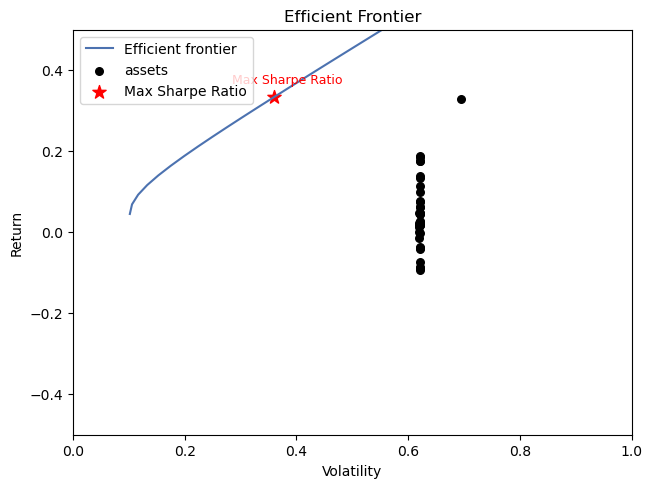

In [63]:
fig, ax = plt.subplots()

# Plot the Efficient Frontier
ef_plot = EfficientFrontier(mu, S, weight_bounds=(-1, 1), solver="ECOS")
plotting.plot_efficient_frontier(ef_plot, ax=ax, show_assets=True)

# Create a new instance for the maximum Sharpe ratio portfolio
ef_max_sharpe = EfficientFrontier(mu, S, weight_bounds=(-1, 1), solver="ECOS")
max_sharpe = ef_max_sharpe.max_sharpe()
ret, vol, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(vol, ret, marker='*', color='r', s=100, label='Max Sharpe Ratio')

# Add a label for the Max Sharpe ratio
ax.annotate('Max Sharpe Ratio', (vol, ret), textcoords="offset points", xytext=(10,10), ha='center', fontsize=9, color='r')

# Set axis limits to focus on the relevant range of values
ax.set_xlim(0, 1)  # Adjust the x-axis (volatility) range as needed
ax.set_ylim(-0.5, 0.5)  # Adjust the y-axis (return) range as needed

ax.set_title("Efficient Frontier")
ax.legend()
plt.show()


# Prescriptive Analysis with Machine Learning Model
We also test our own machine learning model (Random Forest) in the opimization, more specifically,
- Random Forest Regressor, to predict the future returns of the stocks, 
- Mean Variance Optimization, to find the optimal portfolio weights, with the goal of maximum sharpe ratio, given predicted returns and covariance matrix,
- LedoitWolf Method, to estimate the covariance matrix of the stocks,

We report the final result in a rolling window manner, to take average of the predicted returns and covariance matrix for the optimization during the whole period, with the holding period of 12 months.


In [64]:
def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""graph TD
    A[Start] --> B[Set rolling window parameters]
    B --> C[Loop through time periods]
    C --> D[Prepare training data]
    D --> E[Train model]
    E --> F[Predict returns for next period]
    F --> G[Estimate covariance matrix]
    G --> H[Optimize portfolio]
    H --> I[Calculate portfolio metrics]
    I --> J{More periods?}
    J -->|Yes| D
    J -->|No| K[Calculate overall performance]
    K --> L[End]
    
    subgraph "For each period"
        D
        E
        F
        G
        H
        I
    end
""")

In [65]:
def set_multi_index(df , index_columns=['date', 'TICKER']):
        df = df.reset_index()
        df['date'] = pd.to_datetime(df['date'])
        df = df.set_index(index_columns)
        df = df.sort_index()
        return df
rf_data = pd.read_csv('check_daily_combined_data_after_handle_missing_values.csv')
columns_to_drop = ['Unnamed: 0', 'level_0', 'index']
rf_data = rf_data.drop(columns=[col for col in columns_to_drop if col in rf_data.columns])

rf_data = set_multi_index(rf_data)
# rf_data['date'] = pd.to_datetime(rf_data['date'])
# rf_data.set_index('date', inplace=True)
# rf_data.sort_index(inplace=True)

print(rf_data.columns)


Index(['index', 'COMNAM', 'SHRCD', 'EXCHCD', 'SICCD', 'PRC', 'VOL', 'RET',
       'SHROUT', 'BIDLO',
       ...
       'rd_sale', 'adv_sale', 'staff_sale', 'accrual', 'ptb', 'PEG_trailing',
       'divyield', 'TB3MS', 'T10Y2Y', 'BAA10Y'],
      dtype='object', length=107)


/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_4431/3709071120.py:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  rf_data = pd.read_csv('check_daily_combined_data_after_handle_missing_values.csv')


In [66]:
def estimate_covariance(historical_data, data_with_rf_rate, current_tickers, target_column, min_history=60):
    logger.info(f"Starting estimate_covariance with {len(current_tickers)} tickers")
    
    recent_dates = historical_data.index.get_level_values('date').unique()[-min_history:]
    recent_data = historical_data.loc[historical_data.index.get_level_values('date').isin(recent_dates)]
    
    # Create pivot table with tickers as columns
    recent_pivot_data = recent_data[target_column].unstack(level='TICKER')
    # logger.info(f"Shape of pivot_data: {recent_pivot_data.shape}")

    # Get current tickers from pivot table
    if isinstance(recent_pivot_data.columns, pd.MultiIndex):
        recent_pivot_tickers = recent_pivot_data.columns.get_level_values('TICKER').unique()
    else:
        recent_pivot_tickers = recent_pivot_data.columns

    missing_tickers = set(current_tickers) - set(recent_pivot_tickers)
    logger.info(f"Tickers in current_tickers but not in recent_pivot_data: {missing_tickers}")

    # Get the industry codes for the current tickers
    latest_date = recent_dates[-1]
    siccd_map = data_with_rf_rate.loc[data_with_rf_rate.index.get_level_values('date') == latest_date, ['SICCD']]
    siccd_map = siccd_map.reset_index().set_index('TICKER')['SICCD'].to_dict()
    # logger.info(f"Number of stocks in SICCD map: {len(siccd_map)}")
    # logger.info(f"SICCD map: {siccd_map}")

    all_stocks_data = pd.DataFrame(index=recent_pivot_data.index, columns=current_tickers)
    
    # Get the data for the current tickers, fill in missing data with industry data, then with mean
    for ticker in current_tickers:
        if ticker in recent_pivot_data.columns:
            all_stocks_data[ticker] = recent_pivot_data[ticker]
        elif ticker in siccd_map:
            industry = siccd_map[ticker]
            industry_stocks = [s for s in recent_pivot_data.columns if s in siccd_map and siccd_map[s] == industry]
            if industry_stocks:
                all_stocks_data[ticker] = recent_pivot_data[industry_stocks].mean(axis=1)
            else:
                all_stocks_data[ticker] = recent_pivot_data.mean(axis=1)
        else:
            all_stocks_data[ticker] = recent_pivot_data.mean(axis=1)
    
    # Fill in any remaining missing data with the mean
    all_stocks_data = all_stocks_data.fillna(all_stocks_data.mean())

    returns = all_stocks_data

    # Compute the covariance matrix using Ledoit-Wolf shrinkage
    lw = LedoitWolf()
    cov_matrix = lw.fit(returns).covariance_
    
    # Convert the covariance matrix to a DataFrame with the current tickers as the index and columns
    full_cov_matrix = pd.DataFrame(cov_matrix, index=current_tickers, columns=current_tickers)
    
    logger.info(f"Shape of final covariance matrix: {full_cov_matrix.shape}")
    
    return full_cov_matrix.values, current_tickers

def process_single_period(df, data_with_rf_rate, train_start, train_end, test_date, feature_array, target_array, model, avg_rf_rate):
    try:
        logger.info(f"Processing period: training from {train_start} to {train_end}, testing for {test_date}")
        
        # Data preparation
        df = df.sort_index()

        # Prepare training data
        train_data = df[(df.index.get_level_values('date') >= train_start) & (df.index.get_level_values('date') <= train_end)]
        
        # Prepare test data
        test_data = df[df.index.get_level_values('date') == test_date]
        
        if test_data.empty:
            logger.warning(f"No test data available for {test_date}")
            return None
        
        # Get current tickers
        current_tickers = test_data.index.get_level_values('TICKER').unique().tolist()

        # Train the model
        X_train, y_train = train_data[feature_array], train_data[target_array]
        model.fit(X_train.values, y_train.values.ravel())

        # Predict returns
        X_test = test_data[feature_array]
        predicted_returns = model.predict(X_test.values)
        actual_returns = test_data[target_array].values.ravel()

        # Estimate covariance matrix
        cov_matrix, valid_tickers = estimate_covariance(train_data, data_with_rf_rate, current_tickers, target_array[0])

        # Get risk-free rate
        if avg_rf_rate is not None: 
            # To be able to run in a rolling window, when we pass in the average rf rate
            rf_rate = avg_rf_rate
        else: 
            # To be able to run in testing mode
            rf_data = data_with_rf_rate.loc[data_with_rf_rate.index.get_level_values('date') == test_date, 'TB3MS']
            if len(rf_data) > 0:
                annual_rf_rate = rf_data.iloc[0] / 100
                rf_rate = (1 + annual_rf_rate) ** (1/12) - 1
            else:
                last_3_months = data_with_rf_rate.loc[data_with_rf_rate.index.get_level_values('date') < test_date, 'TB3MS'].tail(3)
                if len(last_3_months) > 0:
                    annual_rf_rate = last_3_months.mean() / 100
                    rf_rate = (1 + annual_rf_rate) ** (1/12) - 1
                else:
                    rf_rate = 0.001
                    logger.warning(f"No risk-free rate available for {test_date}, using default value of 0.1%")

        # Optimize portfolio, by minimize negative sharpe ratio
        n = len(predicted_returns)
        def negative_sharpe_ratio(weights):
            portfolio_return = np.sum(predicted_returns * weights)
            portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
            return -(portfolio_return - rf_rate) / portfolio_volatility

        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bounds = tuple((0, 1) for _ in range(n))
        result = minimize(negative_sharpe_ratio, n * [1./n], method='SLSQP', bounds=bounds, 
                          constraints=constraints, options={'maxiter': 1000})
        
        optimal_weights = result.x if result.success else np.ones(n) / n
        
        # Calculate portfolio metrics
        portfolio_return = np.dot(optimal_weights, predicted_returns).item()
        portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
        sharpe_ratio = (portfolio_return - rf_rate) / portfolio_volatility
        
        # Calculate model metrics
        mse = mean_squared_error(actual_returns, predicted_returns)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(actual_returns, predicted_returns)
        r2 = r2_score(actual_returns, predicted_returns)
        
        logger.info(f"Portfolio Return for {test_date}: {portfolio_return:.4f}")
        logger.info(f"Sharpe Ratio for {test_date}: {sharpe_ratio:.4f}")
        logger.info(f"MSE: {mse:.4f}")
        logger.info(f"RMSE: {rmse:.4f}")
        logger.info(f"MAE: {mae:.4f}")
        logger.info(f"R2: {r2:.4f}")
        
        # Display portfolio composition
        portfolio = pd.DataFrame({
            'Ticker': valid_tickers,
            'Weight': optimal_weights
        }).sort_values('Weight', ascending=False)
        
        threshold = 0.01
        portfolio = portfolio[portfolio['Weight'] >= threshold]
        displayed_weight_sum = portfolio['Weight'].sum()
        
        if displayed_weight_sum < 1:
            others_weight = 1 - displayed_weight_sum
            portfolio = pd.concat([portfolio, pd.DataFrame({'Ticker': ['Others'], 'Weight': [others_weight]})])
        
        portfolio['Weight'] = portfolio['Weight'].apply(lambda x: f"{x:.2%}")
        portfolio_str = portfolio.to_string(index=False)
        logger.info(f"Portfolio Composition for {test_date}:\n{portfolio_str}")
        
        # Calculate portfolio return, volatility, and Sharpe ratio
        expected_annual_return = (1 + portfolio_return) ** 12 - 1  
        annual_volatility = portfolio_volatility * np.sqrt(12)  # Note: this assumes constant voltality throughout the year and could be adjusted by GARCH model in the future

        return portfolio_return, expected_annual_return, annual_volatility, sharpe_ratio, mse, rmse, mae, r2

    except Exception as e:
        logger.error(f"Error processing period {train_start} to {test_date}: {str(e)}")
        logger.error(f"Error details: {str(e)}", exc_info=True)
        return None

In [67]:
# Align the input data with the expected format for the functions

# Define the target and features arrays
target_array = ['RET_target']
features_array = features.columns

# Convert the data to the expected format
rf_data['SICCD'] = rf_data['SICCD'].astype(str)

# Define the function to merge the X and Y data
def merge_x_y_data(X_data, Y_data, target_column ):

    X_data = X_data.astype(float)
    Y_data = Y_data.rename(target_column +'_target')
    merged_data = pd.concat([X_data, Y_data], axis=1)
    return merged_data

try:
    merged_df = merge_x_y_data(features, y_preprocessed, target_column = 'RET')
    print("Merged dataset info:")
    print(merged_df.info())
    print("\nMerged dataset head:")
    print(merged_df.head())
except ValueError as e:
    print(f"Error: {e}")
    

Merged dataset info:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 86807 entries, (Timestamp('2014-02-07 00:00:00'), 'AAPL') to (Timestamp('2023-12-29 00:00:00'), 'VRSN')
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cfm             86807 non-null  float64
 1   ps              86807 non-null  float64
 2   dltt_be         86807 non-null  float64
 3   debt_assets     86807 non-null  float64
 4   de_ratio        86807 non-null  float64
 5   aftret_invcapx  86807 non-null  float64
 6   pretret_earnat  86807 non-null  float64
 7   GProf           86807 non-null  float64
 8   intcov_ratio    86807 non-null  float64
 9   cash_ratio      86807 non-null  float64
 10  quick_ratio     86807 non-null  float64
 11  sale_equity     86807 non-null  float64
 12  sale_nwc        86807 non-null  float64
 13  profit_lct      86807 non-null  float64
 14  cash_debt       86807 non-null  float64
 15  adv_sale        86807 

In [69]:
# Test the function with a sample date range with random forest model
# train_start = pd.Timestamp('2017-01-01')  
# train_end = pd.Timestamp('2017-12-31')
# test_date = train_end + pd.offsets.MonthEnd(1)  # 2018-01-31

# Test the function with a sample date range which adjusts covariance matrix
# train_start = pd.Timestamp('2015-09-30')  
# train_end = pd.Timestamp('2016-08-31')
# test_date = pd.Timestamp('2016-09-30')


# result = process_single_period(merged_df, rf_data, train_start, train_end, test_date, features_array, target_array, best_xgb, avg_rf_rate=None)

# if result is not None:
#     portfolio_return, expected_annual_return, annual_volatility, sharpe_ratio, mse, rmse, mae, r2 = result
#     print(f"Portfolio Return: {portfolio_return:.4f}")
#     print(f"Expected Annual Return: {expected_annual_return:.4f}")
#     print(f"Annual Volatility: {annual_volatility:.4f}")
#     print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
#     print(f"MSE: {mse:.4f}")
#     print(f"RMSE: {rmse:.4f}")
#     print(f"MAE: {mae:.4f}")
#     print(f"R²: {r2:.4f}")
# else:
#     print("No valid data for this period.")

Processing period: training from 2015-09-30 00:00:00 to 2016-08-31 00:00:00, testing for 2016-09-30 00:00:00
Starting estimate_covariance with 31 tickers
Tickers in current_tickers but not in recent_pivot_data: {'LSXMA'}
Shape of final covariance matrix: (31, 31)
Portfolio Return for 2016-09-30 00:00:00: 0.0012
Sharpe Ratio for 2016-09-30 00:00:00: 0.0869
MSE: 0.0001
RMSE: 0.0098
MAE: 0.0048
R2: -0.2777
Portfolio Composition for 2016-09-30 00:00:00:
Ticker Weight
     V 88.00%
  VRSN 12.00%


Portfolio Return: 0.0012
Expected Annual Return: 0.0143
Annual Volatility: 0.0377
Sharpe Ratio: 0.0869
MSE: 0.0001
RMSE: 0.0098
MAE: 0.0048
R²: -0.2777


In [70]:
def get_data_for_date_range(df, start_date, end_date):
    # Filter the data for the given date range
    df = set_multi_index(df)
    if start_date is None:
        data = df.loc[:end_date]
    else:
        data = df.loc[start_date:end_date]
    if data.empty:
        logger.warning(f"No data found between {start_date} and {end_date}")
    return data

def prepare_training_data(df, features, target):
    X = df[features]
    y = df[target]
    if X.empty or y.empty:
        logger.warning("Training data is empty.")
    return X, y

def rolling_portfolio_optimization(df, data_with_rf_rate, start_date, end_date, features_array, target_array, model, window_size, holding_period, frequency):

    # Set the date range for the rolling window
    dates = pd.date_range(start_date, end_date, freq=frequency)

    results = []

    # Get the risk-free rate for the given date range
    # Note: it's averaged since it does not change too much over time, mainly to save computational resources
    rf_rates = data_with_rf_rate[(data_with_rf_rate.index.get_level_values('date') >= start_date) & 
                                 (data_with_rf_rate.index.get_level_values('date') <= end_date)]['TB3MS']
    avg_rf_rate = rf_rates.mean() / 100 # Pass this to calculate sharpe ratio
    annualized_rf_rate = (1 + avg_rf_rate) ** 12 - 1 # Report this

    # Loop through the rolling window

    # For example, 
    # if window_size is 12 and holding_period is 3, 
    # then we will train on data from Jan 2010 to Dec 2010, 
    # and test on data from Jan 2011 to Mar 2011
    for i in range(len(dates) - window_size):
        train_start = dates[i]
        train_end = dates[i + window_size - 1]
        test_date = train_end + pd.DateOffset(months=holding_period)
        
        logger.info(f"Training from {train_start} to {train_end}, testing for {test_date}")
        
        if test_date > end_date:
            logger.warning(f"Test date {test_date} is beyond the end date {end_date}")
            break
        
        # Find the closest valid test date
        while test_date not in df.index.get_level_values('date'):
            test_date -= pd.Timedelta(days=1)
            if test_date <= train_end:
                logger.warning(f"No valid test date found after {train_end}")
                break
        
        if test_date <= train_end:
            continue  # Skip this iteration if no valid test date is found
        
        result = process_single_period(df, data_with_rf_rate, train_start, train_end, test_date, 
                                       features_array, target_array, model, avg_rf_rate)
        
        if result is not None:
            portfolio_return, expected_annual_return, annual_volatility, sharpe_ratio, mse, rmse, mae, r2 = result
            results.append({
                'date': test_date,
                'portfolio_return': portfolio_return,
                'expected_annual_return': expected_annual_return,
                'annual_volatility': annual_volatility,
                'sharpe_ratio': sharpe_ratio,
                'mse': mse,
                'rmse': rmse,
                'mae': mae,
                'r2': r2
            })
        else:
            logger.warning(f"No valid result for period ending {test_date}")

    if not results:
        logger.warning("No valid results were generated")
        return pd.DataFrame(), None

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    if 'date' not in results_df.columns:
        logger.error("'date' column is missing from results")
        return pd.DataFrame(), None

    results_df = results_df.set_index('date')

    # Calculate overall annualized return
    if len(results_df) > 0:
        overall_annualized_return = (1 + results_df['portfolio_return']).prod() ** (12 / len(results_df)) - 1
        logger.info(f"Overall Annualized Return: {overall_annualized_return:.4f}")
    else:
        overall_annualized_return = None
        logger.warning("No valid results to calculate overall annualized return")

    # Calculate annualized Sharpe ratio for each year
    results_df['year'] = results_df.index.year
    annual_sharpe_ratios = {}

    for year, group in results_df.groupby('year'):
        annual_return = (1 + group['portfolio_return']).prod() ** (12 / len(group)) - 1
        annual_volatility = group['annual_volatility'].mean()
        
        annual_sharpe_ratio = (annual_return - annualized_rf_rate) / annual_volatility
        annual_sharpe_ratios[year] = annual_sharpe_ratio
        logger.info(f"Year {year} Sharpe Ratio: {annual_sharpe_ratio:.4f}")

    return results_df, overall_annualized_return, annualized_rf_rate, annual_sharpe_ratios


In [77]:
# Test code: run the function with a sample date range
# start_date = pd.Timestamp('2015-10-31')
# end_date = pd.Timestamp('2016-12-31')

# Call the function in the whole date range
start_date = merged_df.index.get_level_values('date').min()
end_date = merged_df.index.get_level_values('date').max()

# Holding period set as 1 month
results_1month, return_1month, rf_rate_1month, annual_sharpe_ratios_1month = rolling_portfolio_optimization(
    merged_df, rf_data, start_date, end_date, features_array, target_array,
    best_xgb, window_size=12, holding_period=1, frequency='ME'
)


Training from 2014-02-28 00:00:00 to 2015-01-31 00:00:00, testing for 2015-02-28 00:00:00
Processing period: training from 2014-02-28 00:00:00 to 2015-01-31 00:00:00, testing for 2015-02-27 00:00:00
Starting estimate_covariance with 28 tickers
Tickers in current_tickers but not in recent_pivot_data: set()
Shape of final covariance matrix: (28, 28)
Portfolio Return for 2015-02-27 00:00:00: -0.0014
Sharpe Ratio for 2015-02-27 00:00:00: -1.0096
MSE: 0.0000
RMSE: 0.0061
MAE: 0.0034
R2: -0.0321
Portfolio Composition for 2015-02-27 00:00:00:
Ticker  Weight
     C 100.00%
Others   0.00%
Training from 2014-03-31 00:00:00 to 2015-02-28 00:00:00, testing for 2015-03-28 00:00:00
Processing period: training from 2014-03-31 00:00:00 to 2015-02-28 00:00:00, testing for 2015-03-27 00:00:00
Starting estimate_covariance with 28 tickers
Tickers in current_tickers but not in recent_pivot_data: set()
Shape of final covariance matrix: (28, 28)
Portfolio Return for 2015-03-27 00:00:00: 0.0004
Sharpe Ratio f

Average Sharpe Ratio: 0.5131253191249839
Average MSE: 0.00022065658448923412

Annualized Return: 16.00%
Annual Volatility: 6.33%
Annualized Risk-Free Rate (fix): 16.7169%


In [80]:
# Average performance metrics for the 1-month holding period
print(f"Average Sharpe Ratio: {results_1month['sharpe_ratio'].mean()}")
print(f"Average MSE: {results_1month['mse'].mean()}")

# Annualized return and volatility for the 1-month holding period
print(f"\nAnnualized Return: {return_1month:.2%}")
print(f"Annual Volatility: {results_1month['annual_volatility'].mean():.2%}")
print(f"Annualized Risk-Free Rate (fix): {rf_rate_1month:.4%}")

Average Sharpe Ratio: 0.5131253191249839
Average MSE: 0.00022065658448923412

Annualized Return: 16.00%
Annual Volatility: 6.33%
Annualized Risk-Free Rate (fix): 16.7169%


In [81]:
results_6month, return_6month, rf_rate_6month, annual_sharpe_ratios_6month = rolling_portfolio_optimization(
    merged_df, rf_data, start_date, end_date, features_array, target_array,
    best_xgb, window_size=12, holding_period=6, frequency='ME'
)

Training from 2014-02-28 00:00:00 to 2015-01-31 00:00:00, testing for 2015-07-31 00:00:00
Processing period: training from 2014-02-28 00:00:00 to 2015-01-31 00:00:00, testing for 2015-07-31 00:00:00
Starting estimate_covariance with 29 tickers
Tickers in current_tickers but not in recent_pivot_data: {'ES'}
Shape of final covariance matrix: (29, 29)
Portfolio Return for 2015-07-31 00:00:00: 0.0101
Sharpe Ratio for 2015-07-31 00:00:00: -0.1912
MSE: 0.0001
RMSE: 0.0110
MAE: 0.0051
R2: -0.2748
Portfolio Composition for 2015-07-31 00:00:00:
Ticker  Weight
   BAC 100.00%
Others   0.00%
Training from 2014-03-31 00:00:00 to 2015-02-28 00:00:00, testing for 2015-08-28 00:00:00
Processing period: training from 2014-03-31 00:00:00 to 2015-02-28 00:00:00, testing for 2015-08-28 00:00:00
Starting estimate_covariance with 29 tickers
Tickers in current_tickers but not in recent_pivot_data: {'ES'}
Shape of final covariance matrix: (29, 29)
Portfolio Return for 2015-08-28 00:00:00: 0.0035
Sharpe Ratio 

In [82]:
# Average performance metrics for the 6-month holding period
print(f"Average Sharpe Ratio: {results_6month['sharpe_ratio'].mean()}")
print(f"Average MSE: {results_6month['mse'].mean()}")


# Annualized return and volatility for the 6-month holding period
print(f"\nAnnualized Return: {return_6month:.2%}")
print(f"Annual Volatility: {results_6month['annual_volatility'].mean():.2%}")
print(f"Annualized Risk-Free Rate (fix): {rf_rate_6month:.4%}")

Average Sharpe Ratio: 0.8155334785066455
Average MSE: 0.00024664150314686074

Annualized Return: 15.67%
Annual Volatility: 6.22%
Annualized Risk-Free Rate (fix): 16.7169%


In [83]:
results_12month, return_12month, rf_rate_12month, annual_sharpe_ratios_12month = rolling_portfolio_optimization(
    merged_df, rf_data, start_date, end_date, features_array, target_array,
    best_rf, window_size=12, holding_period=12, frequency='ME'
)

Training from 2014-02-28 00:00:00 to 2015-01-31 00:00:00, testing for 2016-01-31 00:00:00
Processing period: training from 2014-02-28 00:00:00 to 2015-01-31 00:00:00, testing for 2016-01-29 00:00:00
Starting estimate_covariance with 30 tickers
Tickers in current_tickers but not in recent_pivot_data: {'ES', 'KHC'}
Shape of final covariance matrix: (30, 30)
Portfolio Return for 2016-01-29 00:00:00: 0.0173
Sharpe Ratio for 2016-01-29 00:00:00: 0.4645
MSE: 0.0007
RMSE: 0.0265
MAE: 0.0150
R2: 0.1248
Portfolio Composition for 2016-01-29 00:00:00:
Ticker Weight
  SIRI 39.13%
    MA 35.82%
   CBS 25.06%
Others  0.00%
Training from 2014-03-31 00:00:00 to 2015-02-28 00:00:00, testing for 2016-02-28 00:00:00
Processing period: training from 2014-03-31 00:00:00 to 2015-02-28 00:00:00, testing for 2016-02-26 00:00:00
Starting estimate_covariance with 30 tickers
Tickers in current_tickers but not in recent_pivot_data: {'ES', 'KHC'}
Shape of final covariance matrix: (30, 30)
Portfolio Return for 2016

In [84]:
# Average performance metrics for the 12-month holding period
print(f"Average Sharpe Ratio: {results_12month['sharpe_ratio'].mean()}")
print(f"Average MSE: {results_12month['mse'].mean()}")

# Annualized return and volatility for the 12-month holding period
print(f"\nAnnualized Return: {return_12month:.2%}")
print(f"Annual Volatility: {results_12month['annual_volatility'].mean():.2%}")
print(f"Annualized Risk-Free Rate (fix): {rf_rate_12month:.4%}")

Average Sharpe Ratio: 1.872729190749273
Average MSE: 0.000304500160419069

Annualized Return: 27.56%
Annual Volatility: 6.39%
Annualized Risk-Free Rate (fix): 16.7169%


By comparing holding periods of 1, 6, and 12 months, we find that the 12-month holding period has the highest average Sharpe ratio and the lowest average MSE. This suggests that a 12-month holding period may be the optimal choice for this portfolio.

Also there is a tendency for the Sharpe ratio to increase with the length of the holding period.

# Conclusion.

We predict the returns and optimize the portfolio using the Sharpe ratio based on historical price data. We find that the portfolio has a high expected annual return (33.3%) and low annual volatility (35.9%), indicating that it is a good investment portfolio. We also find that the portfolio has a high Sharpe ratio (0.87), indicating that it is a good investment portfolio with low risk.

We also use machine learning models to predict and opimize the portfolio, like random forest and XGBoost. By selecting the best features and hyperparameters, we find that when the holding period is 12 months, the portfolio has a high expected annual return (27.56%) and low annual volatility (6.39%), indicating that it is a good investment portfolio. We also find that the portfolio has a high Sharpe ratio (1.87), indicating that it is a good investment portfolio with low risk.

By comparing these two methods we find that the machine learning models have a higher Sharpe ratio, indicating that they are better at predicting and optimizing the portfolio when it is finely tuned. More importantly, machine learning models provide explanations for the features that contribute to the portfolio's performance, which may help investors make better investment decisions even with little historical data in the field.

Still there is room for improvement:
- Feature engineering can be improved by reducing multi-collinearity and adding more features that may be relevant to the returns of the portfolio.
- Model optimization can be improved by trying different models and hyperparameters to find the best model for the data.
- Portfolio optimization can be improved by trying different optimization methods and risk management strategies to maximize returns and minimize risk.
- We could also try to use more sophisticated models, like GARCH or LSTM, to predict the returns of the portfolio.

Making use of a bit of knowledge from Gu et al we find that Buffet actually has quite a great portfolio but perhaps needs to reduce his shares in some already large companies. Companies that could require reduced exposure include Apple.

In tandem with our portfolio we find that Buffet [reduced](https://www.cnbc.com/2024/08/03/warren-buffetts-berkshire-hathaway-sold-nearly-half-its-stake-in-apple.html) his number of shares in Apple by nearly half, far greater than our estimated short position of 12%.